# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

Дедлайн 4 декабря

In [1]:
import json
import pandas as pd
import numpy as np

## Запустите следующую клетку. Будет случайно выбрана аминокислота, для которой вы будете проводить исследование

In [193]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

In [233]:
print(f"Моя аминокислота - {np.random.choice(amacid_names)}")

Моя аминокислота - ILE


## Загрузите <a href="https://yadi.sk/d/FeLl5KYfjbhHgA?w=1">отсюда</a> соответствующий файл. Далее мы будем работать с ним.

# Часть 1. Анализ значений угла $\chi_1$

## Задание 1.1. Откроем загруженный файл. Посмотрим на колонки:

In [3]:
!pwd

/Users/mac-julia/Documents/proteins_hse


In [4]:
!ls

HW_3_smollkina_side-chains_task-Copy1.ipynb
HW_3_smollkina_side-chains_task.ipynb
Lectures
__pycache__
docking-potential-design.ipynb
geometry.py
lennard-jones_12-6.csv
obsolete
side-chain data
side-chain data.zip
side-chain data.zip.download
side-chains_task.ipynb
z8


In [63]:
#dpath = "/Users/andreyignatov/Downloads/SER_data.csv" 
dpath =  "/Users/mac-julia/Documents/proteins_hse/side-chain data/ILE_data.csv"

In [78]:
df = pd.read_csv(dpath)

In [79]:
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,...,149.497815,41.249609,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189
1,1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,...,70.701617,40.707637,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747
2,2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,...,53.288917,14.692650,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501
3,3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,...,143.678835,109.953109,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228
4,4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,...,82.929903,96.622779,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644


In [80]:
df_copy = df.copy()

Эта таблица содержит информацию о сэмплах одной аминокислоты. Для каждого сэмпла известны:
- Значения всех двугранных углов $\chi$;
- Значения $\phi, \psi, \alpha$ (двугранный угол, построенный по 4 последовательным атомам $C_\alpha$);
- Данные о 17 ближайших пространственных соседях:
    - $\phi, \psi$;
    - Названия аминокислот;
    - Расстояние до целевой аминокислоты по $C_\alpha$;
    - Химические / физикохимические характеристики соседа: группы и точные значения некоторых характеристик;
    - Дополнительные геометрические характеристики (относительно целевой аминокислоты).

## Задание 1.2. Постройте гистограмму значений $\chi_1$ из этой таблицы. Какие ротамеры выделяются на этой гистограмме?

In [81]:
import matplotlib.pyplot as plt

In [82]:
df = df[~np.isnan(df["chi_1"])]

In [83]:
df_copy = df.copy()

# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [84]:
# изменение угла (x+ pi)//(2*pi/18)

In [85]:
import seaborn as sns

In [86]:
from math import pi

In [87]:
t = []
for i in df["chi_1"]:
    t.append((i+pi)//(2*pi/18))

In [88]:
t

[-488.0,
 -476.0,
 -158.0,
 -308.0,
 -144.0,
 -156.0,
 162.0,
 -198.0,
 -135.0,
 -164.0,
 185.0,
 -125.0,
 -259.0,
 151.0,
 91.0,
 -170.0,
 -501.0,
 -132.0,
 65.0,
 90.0,
 -195.0,
 -180.0,
 -429.0,
 210.0,
 -142.0,
 -161.0,
 -148.0,
 -180.0,
 -151.0,
 -181.0,
 -133.0,
 -172.0,
 -171.0,
 -204.0,
 -156.0,
 -494.0,
 -477.0,
 -189.0,
 -175.0,
 -469.0,
 -149.0,
 -181.0,
 -155.0,
 -191.0,
 -175.0,
 -179.0,
 -185.0,
 -198.0,
 -190.0,
 -154.0,
 -127.0,
 -215.0,
 -207.0,
 -193.0,
 -196.0,
 205.0,
 -126.0,
 -164.0,
 -452.0,
 253.0,
 515.0,
 -167.0,
 -158.0,
 -160.0,
 173.0,
 -492.0,
 -170.0,
 -179.0,
 -158.0,
 -201.0,
 -180.0,
 -458.0,
 -150.0,
 -165.0,
 -133.0,
 -357.0,
 -206.0,
 -148.0,
 -184.0,
 -145.0,
 -145.0,
 -484.0,
 -172.0,
 -176.0,
 204.0,
 -165.0,
 -127.0,
 -186.0,
 191.0,
 -152.0,
 -133.0,
 -151.0,
 517.0,
 -140.0,
 -177.0,
 189.0,
 213.0,
 -181.0,
 -173.0,
 -211.0,
 -452.0,
 -221.0,
 -183.0,
 -468.0,
 -213.0,
 227.0,
 224.0,
 185.0,
 -190.0,
 -495.0,
 -446.0,
 -158.0,
 -244.0,
 267.

In [89]:
# df['chi_class'] = t

In [90]:
df['chi_class'] = df['chi_1'].apply(lambda x: get_class(x, rotamers))

In [91]:
df['chi_class'] 

0        2
1        2
2        1
3        1
4        1
        ..
63041    1
63042    1
63043    1
63044    1
63045    1
Name: chi_class, Length: 62825, dtype: int64

In [92]:
df['chi_class'].value_counts().reset_index().sort_values('chi_class').rename({'index': 'class', 'chi_class': 'amount '}, axis=1)


,class,amount
2,2,6725
1,0,10165
0,1,45935


<Figure size 400x300 with 0 Axes>

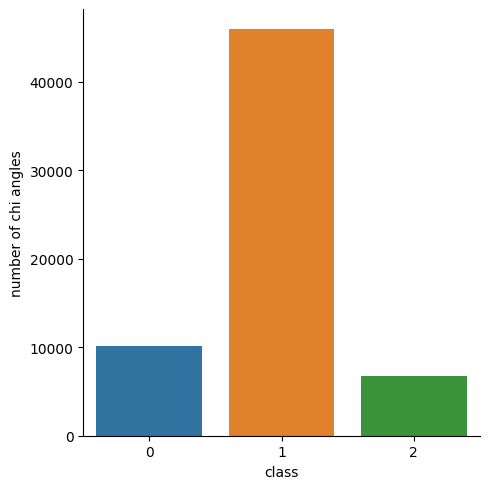

In [93]:
plt.figure(figsize=(4, 3))
sns.catplot(data=table, x='class', y='number of chi angles',kind="bar")

## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [39]:
# всего 18 классов

In [106]:
def new_val(x):
    return(abs((x + 180)/20))

In [95]:
# block = []
# for i in t:
#     if i%20 == 0:
#         block.append(abs(i//20))
#     else:
#         block.append(abs(i//20+i%20))
# block

In [96]:
# df['block'] = block

In [107]:
df['phi']

0       -132.673875
1        -58.525876
2        -65.144927
3        -67.271147
4        -67.401125
            ...    
63041   -121.353153
63042   -100.731831
63043    -73.092971
63044    -46.594126
63045    -51.648374
Name: phi, Length: 62825, dtype: float64

In [108]:
df['alpha']

0        132.908004
1         39.513266
2         49.391530
3         38.174192
4         57.449097
            ...    
63041   -144.929397
63042    143.276514
63043     42.510484
63044     40.063601
63045     61.432708
Name: alpha, Length: 62825, dtype: float64

In [109]:
df['psi']

0        143.415464
1        -46.093168
2        -32.202032
3        -49.556771
4        -38.312026
            ...    
63041    126.716381
63042    101.492657
63043    -30.659857
63044    -55.146881
63045    -45.613184
Name: psi, Length: 62825, dtype: float64

In [110]:
df['phi_class'] = df['phi'].apply(new_val)
df['psi_class'] = df['psi'].apply(new_val)
df['alpha_class'] = df['alpha'].apply(new_val)

In [111]:
for i in (df['psi'],df['alpha'],df['phi']):
    print(i.value_counts())

-48.378315     2
-42.004739     2
 49.862156     2
-44.651125     2
-43.329097     2
              ..
 143.093077    1
 119.441891    1
 106.233420    1
-7.176221      1
-45.613184     1
Name: psi, Length: 62786, dtype: int64
 42.810201     2
 53.364678     2
 99.655285     2
-60.904145     2
 49.158435     2
              ..
-169.017912    1
-176.946727    1
-129.460922    1
 54.444386     1
 61.432708     1
Name: alpha, Length: 62786, dtype: int64
-63.977751     2
-61.569087     2
-162.984844    2
-75.428095     2
-74.189818     2
              ..
-101.315342    1
-131.028684    1
-118.596178    1
-78.071985     1
-51.648374     1
Name: phi, Length: 62786, dtype: int64


In [114]:
df.isnull().sum().sort_values(ascending=False).head(30)

n_phi_14    236
n_psi_14    236
n_phi_8     178
n_psi_8     178
n_phi_4     161
n_psi_4     161
n_psi_13    151
n_phi_13    151
n_phi_7     139
n_psi_7     139
n_psi_10    135
n_phi_10    135
n_phi_16    133
n_psi_16    133
n_psi_9     131
n_phi_9     131
n_phi_17    127
n_psi_17    127
n_phi_11    125
n_psi_11    125
n_psi_12    123
n_phi_12    123
n_psi_15    120
n_phi_15    120
n_psi_5     117
n_phi_5     117
n_phi_6     115
n_psi_6     115
n_phi_3      96
n_psi_3      96
dtype: int64

## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера. 

In [102]:
df_cat = df.select_dtypes(include=[object])
print(f'Всего {df_cat.shape[1]} категориальных переменных')

Всего 138 категориальных переменных


In [115]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,phi_class,psi_class,alpha_class
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,2,2.366306,16.170773,15.645400
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,2,6.073706,6.695342,10.975663
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,1,5.742754,7.389898,11.469576
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,1,5.636443,6.522161,10.908710
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,1,5.629944,7.084399,11.872455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,5X1X,-121.353153,126.716381,124.146485,-144.929397,78,51,E,0,-85.049371,...,128.941322,45.503916,56.835975,68.407924,172.074909,94.987919,1,2.932342,15.335819,1.753530
63042,5X1X,-100.731831,101.492657,110.033866,143.276514,101,28,-,0,-71.525675,...,42.864891,97.835056,127.403928,42.556767,80.423456,132.556159,1,3.963408,14.074633,16.163826
63043,5X1X,-73.092971,-30.659857,91.436514,42.510484,106,23,T,0,-56.233248,...,71.770644,172.688151,93.315752,86.056729,30.563075,100.715354,1,5.345351,7.467007,11.125524
63044,5X1X,-46.594126,-55.146881,91.555714,40.063601,119,10,H,0,-89.346228,...,59.775282,18.430398,82.098894,54.403891,50.741328,40.997152,1,6.670294,6.242656,11.003180


### найдем колонки с нечисленными значениями

In [116]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
not_num_col = list(set(df.columns.tolist()) - set(num_col))
not_num_col = sorted(not_num_col)
not_num_col

['n_10_charge_group',
 'n_10_chemical_group',
 'n_10_hydrogen_donor_acceptor_group',
 'n_10_hydropathy_group',
 'n_10_physicochemical_group',
 'n_10_polarity_group',
 'n_10_volume_group',
 'n_11_charge_group',
 'n_11_chemical_group',
 'n_11_hydrogen_donor_acceptor_group',
 'n_11_hydropathy_group',
 'n_11_physicochemical_group',
 'n_11_polarity_group',
 'n_11_volume_group',
 'n_12_charge_group',
 'n_12_chemical_group',
 'n_12_hydrogen_donor_acceptor_group',
 'n_12_hydropathy_group',
 'n_12_physicochemical_group',
 'n_12_polarity_group',
 'n_12_volume_group',
 'n_13_charge_group',
 'n_13_chemical_group',
 'n_13_hydrogen_donor_acceptor_group',
 'n_13_hydropathy_group',
 'n_13_physicochemical_group',
 'n_13_polarity_group',
 'n_13_volume_group',
 'n_14_charge_group',
 'n_14_chemical_group',
 'n_14_hydrogen_donor_acceptor_group',
 'n_14_hydropathy_group',
 'n_14_physicochemical_group',
 'n_14_polarity_group',
 'n_14_volume_group',
 'n_15_charge_group',
 'n_15_chemical_group',
 'n_15_hydroge

In [117]:
len(not_num_col)

138

In [119]:
# действительно 138 значений

In [49]:
df.applymap(lambda x: isinstance(x, (int, float))) # we need false

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63042,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63043,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63044,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [120]:
from random import seed
from random import random
import time
seed(1)

### выберем все униклаьные значения в нужных колонках

In [121]:
#chose unique values from dataframe not int of float type
cur = set()
for i in not_num_col:
    cur_ = set(df[i])
    cur = cur.union(cur_)  

In [122]:
len(cur)

6109

In [123]:
dict_uniq = {}
for i in cur:
    dict_uniq[i] = len(dict_uniq)
dict_uniq

{nan: 0,
 '5P10': 1,
 '2DJ1': 2,
 '5WF9': 3,
 '6G5R': 4,
 '3IJV': 5,
 '2LAF': 6,
 '2RER': 7,
 '2JO6': 8,
 '3N4U': 9,
 '1EOV': 10,
 '2L1H': 11,
 '5XRH': 12,
 '1L1P': 13,
 '4CXI': 14,
 '5P8U': 15,
 '3WMK': 16,
 '1X1F': 17,
 '2N6L': 18,
 '4ZXM': 19,
 '1DMO': 20,
 '2LBX': 21,
 '5EDJ': 22,
 '2M0T': 23,
 '2L9F': 24,
 '5P6G': 25,
 '5M8K': 26,
 '2YZ0': 27,
 '3VC0': 28,
 '1XIX': 29,
 '2APN': 30,
 '1DHN': 31,
 '5P4G': 32,
 '5HU2': 33,
 '2E9G': 34,
 '1Q2Y': 35,
 '5P6J': 36,
 '1DG4': 37,
 '5LEE': 38,
 '5XYL': 39,
 '3O5P': 40,
 '5H0Q': 41,
 '1J0S': 42,
 '2NAM': 43,
 '1CTO': 44,
 '2KU5': 45,
 '2L5L': 46,
 '5HTJ': 47,
 '6GWA': 48,
 '2N9U': 49,
 '1XZ9': 50,
 '3QAV': 51,
 '5WF2': 52,
 '6C5Y': 53,
 '6FD7': 54,
 '2M83': 55,
 '5P5Y': 56,
 '1EYC': 57,
 '4ZBH': 58,
 '5TSY': 59,
 '1Q2Z': 60,
 '2M1Z': 61,
 '2MVO': 62,
 '4QWV': 63,
 'B': 64,
 '2KQA': 65,
 '5EV7': 66,
 '2GZP': 67,
 '1B6E': 68,
 '2E60': 69,
 '2JVB': 70,
 '1G2U': 71,
 '1GXQ': 72,
 '2AVG': 73,
 '2P65': 74,
 '5GVQ': 75,
 '1AB2': 76,
 '1A6C': 77,
 '

In [124]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,phi_class,psi_class,alpha_class
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,2,2.366306,16.170773,15.645400
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,2,6.073706,6.695342,10.975663
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,1,5.742754,7.389898,11.469576
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,1,5.636443,6.522161,10.908710
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,1,5.629944,7.084399,11.872455


In [125]:
type('H')==str

True

### теперь заменим все на сгенерированные числовые значения

In [133]:
df_copy = df.copy()

In [127]:
from sklearn import preprocessing

In [128]:
label_encode = preprocessing.LabelEncoder()

In [129]:
df.columns.get_loc('psi')

2

In [134]:
for col in df.columns:
    if df_copy[col].dtype == object:
        label_encode.fit(df_copy[col])
        df_copy[col + '_encoded'] = label_encode.transform(df_copy[col])
        df_copy = df_copy.drop(labels=col, axis=1)

/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[col + '_encoded'] = label_encode.transform(df_copy[col])
/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[col + '_encoded'] = label_encode.transform(df_copy[col])
/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[col + '_encoded'] = label_encode.transform(df_copy[col])
/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[col + '_encoded'] = label_encode.transform(df_copy[col])
/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_2015/1600832257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [135]:
df_copy.head()

,phi,psi,tau,alpha,ind_from_start,ind_from_end,is_tail,chi_1,chi_2,n_phi_1,...,n_16_physicochemical_group_encoded,n_16_polarity_group_encoded,n_16_volume_group_encoded,n_17_charge_group_encoded,n_17_chemical_group_encoded,n_17_hydrogen_donor_acceptor_group_encoded,n_17_hydropathy_group_encoded,n_17_physicochemical_group_encoded,n_17_polarity_group_encoded,n_17_volume_group_encoded
0,-132.673875,143.415464,131.682519,132.908004,10,109,0,-173.454724,105.498512,-148.001357,...,4,0,3,0,4,1,0,3,1,0
1,-58.525876,-46.093168,91.839903,39.513266,13,106,0,-169.000874,-74.457561,157.271213,...,3,1,0,2,2,2,0,2,1,2
2,-65.144927,-32.202032,89.886732,49.391530,44,75,0,-57.954325,153.541023,-76.835747,...,7,0,2,1,0,0,0,0,1,1
3,-67.271147,-49.556771,94.279261,38.174192,85,34,0,-110.633803,74.185645,-67.401758,...,6,1,4,2,1,3,1,1,0,0
4,-67.401125,-38.312026,91.813249,57.449097,101,18,0,-53.128974,142.815218,-71.394747,...,2,1,1,1,0,0,0,0,1,1


In [56]:
# %%time
# for i in not_num_col:
#     print(i)
#     start_time = time.time()
#     for j in (df[i].unique()):
#         print(j)
#         if type(j)==str:
#             df = df.replace(to_replace = j, value = dict_uniq[j])
#     end_time = time.time()
#        # df.replace(dict_uniq)
#     print(' for {} all values are replaced and it took {}'.format(i,end_time-start_time))

n_10_charge_group
-CHARGED
UNCHARGED
+CHARGED
 for n_10_charge_group all values are replaced and it took 1.1602418422698975
n_10_chemical_group
ACIDIC
HYDROXYL
ALIPHATIC
BASIC
AROMATIC
SULFUR
AMIDE
 for n_10_chemical_group all values are replaced and it took 2.083099126815796
n_10_hydrogen_donor_acceptor_group
ACCEPTOR
DONOR-ACCEPTOR
NONE
DONOR
 for n_10_hydrogen_donor_acceptor_group all values are replaced and it took 1.1424601078033447
n_10_hydropathy_group
HYDROPHILIC
NEUTRAL
HYDROPHOBIC
 for n_10_hydropathy_group all values are replaced and it took 0.840965986251831
n_10_physicochemical_group
3142
2227
3421
3731
F
G
137
1431
P
Y
W
 for n_10_physicochemical_group all values are replaced and it took 0.9955739974975586
n_10_polarity_group
POLAR
NONPOLAR
 for n_10_polarity_group all values are replaced and it took 0.4851398468017578
n_10_volume_group
MEDIUM
SMALL
LARGE
VERY_SMALL
VERY_LARGE
 for n_10_volume_group all values are replaced and it took 0.6256067752838135
n_11_charge_group


In [57]:
# len(df['n_10_charge_group'])

62825

In [58]:
# np.unique(df['n_10_charge_group'])

array([3098, 3876, 4694])

In [59]:
# df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2559,-132.673875,143.415464,131.682519,132.908004,10,109,2066.0,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2559,-58.525876,-46.093168,91.839903,39.513266,13,106,4818.0,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2559,-65.144927,-32.202032,89.886732,49.391530,44,75,4818.0,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2559,-67.271147,-49.556771,94.279261,38.174192,85,34,4818.0,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2559,-67.401125,-38.312026,91.813249,57.449097,101,18,4818.0,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


In [60]:
#check if there are any not numeric columns

In [61]:
# num_col = df.select_dtypes(include=np.number).columns.tolist()
# not_num_col = list(set(df.columns.tolist()) - set(num_col))
# not_num_col

[]

# pre process

In [136]:
df = df_copy.copy()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62825 entries, 0 to 63045
Columns: 304 entries, phi to n_17_volume_group_encoded
dtypes: float64(162), int64(142)
memory usage: 146.2 MB


In [138]:
df = df.dropna()

phi
for phi it took 0.0 seconds
psi
for psi it took 0.0 seconds
tau
for tau it took 0.0 seconds
alpha
for alpha it took 0.0 seconds
ind_from_start
for ind_from_start it took 0.0 seconds
ind_from_end
for ind_from_end it took 0.0 seconds
is_tail
for is_tail it took 0.0 seconds
chi_1
for chi_1 it took 0.0 seconds
chi_2
for chi_2 it took 0.0 seconds
CPU times: user 11.1 s, sys: 11.4 s, total: 22.5 s
Wall time: 9.83 s


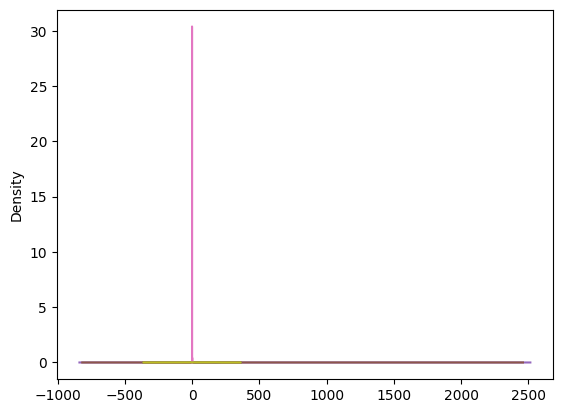

In [139]:
%%time
for i in num_col[0:9]:
    start_time = time.time()
    print(i)
    df[i].plot(kind='kde')
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

In [140]:
import random
number_of_colors = 4

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

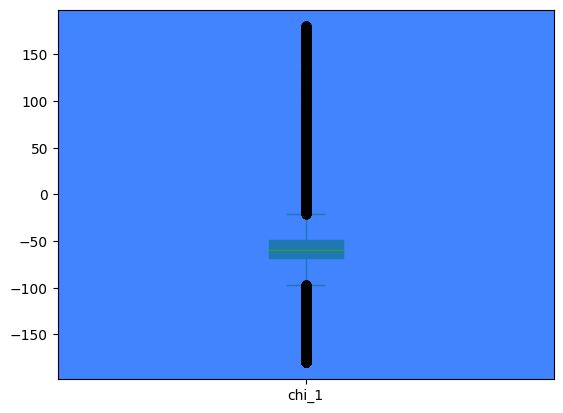

for chi_1 it took 0.0 seconds


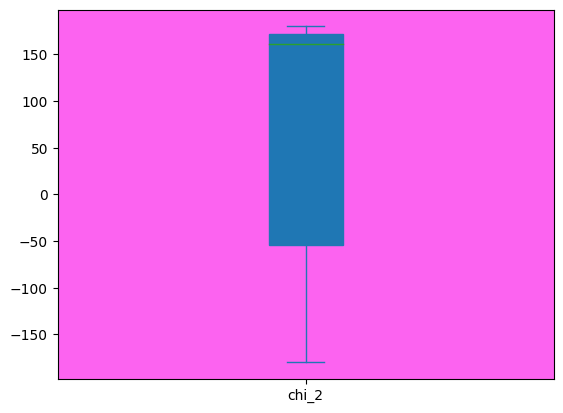

for chi_2 it took 0.0 seconds


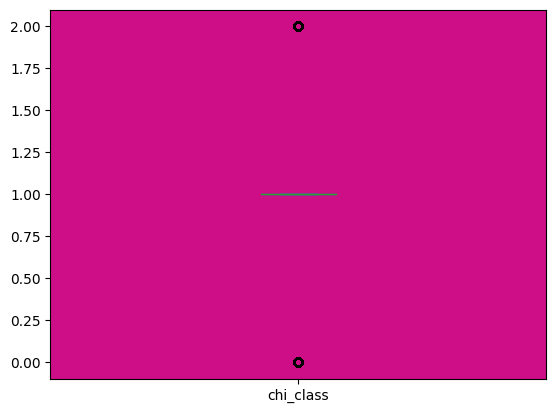

for chi_class it took 0.0 seconds


KeyError: 'block'

In [141]:
%%time
count = 0
for i in ['chi_1', 'chi_2', 'chi_class', 'block']:
    start_time = time.time()
    b = df[i].plot.box(patch_artist=True)
    b.set_facecolor(color[count])
    plt.show()
    count = count + 1
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [71]:
!pip install xgboost 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.2 MB/s eta 0:00:0000:0100:01


In [142]:
import xgboost as xgb

In [143]:
from sklearn.metrics import * #accuracy_score

Разделите выборку на обучающую и тестовую в соотношении 0.7/0.3. 


В X должны быть все признаки, кроме Unnamed, pdb_id и всех столбцов со значениями углов $\chi$.


y - столбец дискретизированных значений $\chi_1$.

In [144]:
import re

In [145]:
col = df.columns.tolist()
col

['phi',
 'psi',
 'tau',
 'alpha',
 'ind_from_start',
 'ind_from_end',
 'is_tail',
 'chi_1',
 'chi_2',
 'n_phi_1',
 'n_psi_1',
 'n_phi_2',
 'n_psi_2',
 'n_phi_3',
 'n_psi_3',
 'n_phi_4',
 'n_psi_4',
 'n_phi_5',
 'n_psi_5',
 'n_phi_6',
 'n_psi_6',
 'n_phi_7',
 'n_psi_7',
 'n_phi_8',
 'n_psi_8',
 'n_phi_9',
 'n_psi_9',
 'n_phi_10',
 'n_psi_10',
 'n_phi_11',
 'n_psi_11',
 'n_phi_12',
 'n_psi_12',
 'n_phi_13',
 'n_psi_13',
 'n_phi_14',
 'n_psi_14',
 'n_phi_15',
 'n_psi_15',
 'n_phi_16',
 'n_psi_16',
 'n_phi_17',
 'n_psi_17',
 'n_dist_1',
 'n_dist_2',
 'n_dist_3',
 'n_dist_4',
 'n_dist_5',
 'n_dist_6',
 'n_dist_7',
 'n_dist_8',
 'n_dist_9',
 'n_dist_10',
 'n_dist_11',
 'n_dist_12',
 'n_dist_13',
 'n_dist_14',
 'n_dist_15',
 'n_dist_16',
 'n_dist_17',
 'n_1_charge_pK',
 'n_1_hydropathy_Kyte-Doolitle',
 'n_1_volume_value',
 'n_2_charge_pK',
 'n_2_hydropathy_Kyte-Doolitle',
 'n_2_volume_value',
 'n_3_charge_pK',
 'n_3_hydropathy_Kyte-Doolitle',
 'n_3_volume_value',
 'n_4_charge_pK',
 'n_4_hydro

In [146]:
p = re.compile('chi*')
newlist = list(filter(p.match, col)) # Read Note below
print(newlist)

['chi_1', 'chi_2', 'chi_class']


In [147]:
df_x = df.loc[:,~df.columns.isin(['chi_1', 'chi_2', 'chi_class', 'chi_3', 'pbd_indx'])]
df_x 

,phi,psi,tau,alpha,ind_from_start,ind_from_end,is_tail,n_phi_1,n_psi_1,n_phi_2,...,n_16_physicochemical_group_encoded,n_16_polarity_group_encoded,n_16_volume_group_encoded,n_17_charge_group_encoded,n_17_chemical_group_encoded,n_17_hydrogen_donor_acceptor_group_encoded,n_17_hydropathy_group_encoded,n_17_physicochemical_group_encoded,n_17_polarity_group_encoded,n_17_volume_group_encoded
0,-132.673875,143.415464,131.682519,132.908004,10,109,0,-148.001357,-67.992231,-174.554819,...,4,0,3,0,4,1,0,3,1,0
1,-58.525876,-46.093168,91.839903,39.513266,13,106,0,157.271213,-65.320600,-72.400953,...,3,1,0,2,2,2,0,2,1,2
2,-65.144927,-32.202032,89.886732,49.391530,44,75,0,-76.835747,-30.680678,-69.579598,...,7,0,2,1,0,0,0,0,1,1
3,-67.271147,-49.556771,94.279261,38.174192,85,34,0,-67.401758,-20.736880,-68.444395,...,6,1,4,2,1,3,1,1,0,0
4,-67.401125,-38.312026,91.813249,57.449097,101,18,0,-71.394747,-34.235373,-58.767654,...,2,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63039,-90.718425,151.191420,124.120811,-142.810261,62,67,0,-44.677966,117.046225,-116.044353,...,3,1,0,1,0,0,0,0,1,2
63040,-167.720376,157.989273,143.444417,-118.363065,68,61,0,-81.336043,-63.308252,-110.761556,...,3,1,0,1,0,0,0,0,1,1
63041,-121.353153,126.716381,124.146485,-144.929397,78,51,0,118.552928,-153.733059,-92.593094,...,8,0,0,2,5,2,2,6,1,2
63042,-100.731831,101.492657,110.033866,143.276514,101,28,0,176.937992,-176.145006,-143.337801,...,7,0,2,2,5,2,2,6,1,2


In [150]:
X = df_x
# y = df.loc[:,df.columns.isin(['block'])].values

In [151]:
X

,phi,psi,tau,alpha,ind_from_start,ind_from_end,is_tail,n_phi_1,n_psi_1,n_phi_2,...,n_16_physicochemical_group_encoded,n_16_polarity_group_encoded,n_16_volume_group_encoded,n_17_charge_group_encoded,n_17_chemical_group_encoded,n_17_hydrogen_donor_acceptor_group_encoded,n_17_hydropathy_group_encoded,n_17_physicochemical_group_encoded,n_17_polarity_group_encoded,n_17_volume_group_encoded
0,-132.673875,143.415464,131.682519,132.908004,10,109,0,-148.001357,-67.992231,-174.554819,...,4,0,3,0,4,1,0,3,1,0
1,-58.525876,-46.093168,91.839903,39.513266,13,106,0,157.271213,-65.320600,-72.400953,...,3,1,0,2,2,2,0,2,1,2
2,-65.144927,-32.202032,89.886732,49.391530,44,75,0,-76.835747,-30.680678,-69.579598,...,7,0,2,1,0,0,0,0,1,1
3,-67.271147,-49.556771,94.279261,38.174192,85,34,0,-67.401758,-20.736880,-68.444395,...,6,1,4,2,1,3,1,1,0,0
4,-67.401125,-38.312026,91.813249,57.449097,101,18,0,-71.394747,-34.235373,-58.767654,...,2,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63039,-90.718425,151.191420,124.120811,-142.810261,62,67,0,-44.677966,117.046225,-116.044353,...,3,1,0,1,0,0,0,0,1,2
63040,-167.720376,157.989273,143.444417,-118.363065,68,61,0,-81.336043,-63.308252,-110.761556,...,3,1,0,1,0,0,0,0,1,1
63041,-121.353153,126.716381,124.146485,-144.929397,78,51,0,118.552928,-153.733059,-92.593094,...,8,0,0,2,5,2,2,6,1,2
63042,-100.731831,101.492657,110.033866,143.276514,101,28,0,176.937992,-176.145006,-143.337801,...,7,0,2,2,5,2,2,6,1,2


In [155]:
y = df['chi_class']

In [81]:
# y

array([[13.],
       [20.],
       [ 6.],
       ...,
       [ 7.],
       [ 6.],
       [ 0.]])

In [84]:
# X = np.delete(X, 1, axis=1)
# # X_== X
# X

array([[-132.67387498,  132.90800425,   10.        , ...,   43.20641748,
         128.4538924 ,   80.47718884],
       [ -58.52587571,   39.51326581,   13.        , ...,   43.69917806,
          96.29688367,   52.40674718],
       [ -65.1449267 ,   49.3915298 ,   44.        , ...,  131.69147037,
          92.2957452 ,   47.25050077],
       ...,
       [-121.35315283, -144.92939665,   78.        , ...,   68.40792356,
         172.07490919,   94.9879189 ],
       [-100.73183051,  143.27651401,  101.        , ...,   42.55676745,
          80.42345574,  132.55615866],
       [ -46.59412619,   40.06360094,  119.        , ...,   54.40389108,
          50.74132849,   40.99715181]])

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [157]:
from sklearn import tree

# DecisionTreeClassifier №1

In [158]:
%%time
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

CPU times: user 25.1 s, sys: 150 ms, total: 25.3 s
Wall time: 25.3 s


In [159]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 18.1 ms, sys: 7.2 ms, total: 25.3 ms
Wall time: 25.7 ms


In [89]:
# %%time
# tree.plot_tree(clf) 

CPU times: user 44.8 s, sys: 3.4 s, total: 48.2 s
Wall time: 48.3 s


[Text(0.8700051259970838, 0.9910714285714286, 'X[245] <= 127.427\ngini = 0.942\nsamples = 42490\nvalue = [1617, 3221, 3211, 3339, 3327, 3421, 3393, 3399, 3084\n2522, 1688, 1052, 695, 622, 570, 520, 517, 543, 562\n602, 558, 548, 528, 499, 429, 370, 404, 363, 199\n84, 69, 40, 38, 44, 33, 36, 41, 41, 39, 43, 28\n46, 49, 32, 24]'),
 Text(0.7637803634723908, 0.9732142857142857, 'X[248] <= 130.294\ngini = 0.938\nsamples = 39118\nvalue = [1572, 3096, 3101, 3226, 3214, 3291, 3272, 3254, 2940\n2405, 1553, 921, 568, 485, 463, 406, 421, 419, 420\n430, 420, 436, 422, 387, 344, 283, 318, 283, 151\n67, 66, 36, 37, 38, 30, 35, 36, 37, 34, 41, 25\n39, 44, 31, 21]'),
 Text(0.6241634189636925, 0.9553571428571429, 'X[44] <= 5.273\ngini = 0.934\nsamples = 36804\nvalue = [1544, 3038, 3049, 3180, 3126, 3220, 3206, 3165, 2852\n2296, 1430, 814, 487, 385, 381, 308, 323, 321, 330\n353, 334, 347, 349, 320, 280, 230, 254, 227, 112\n55, 58, 31, 31, 33, 30, 32, 30, 33, 28, 39, 24\n32, 42, 26, 19]'),
 Text(0.5104038

Error in callback <function _draw_all_if_interactive at 0x7f7ee851f820> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7ee873d790> (for post_execute):


KeyboardInterrupt: 

In [160]:
from sklearn import metrics

In [161]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.7861966727063087
balanced_accuracy_score:  0.6374292362668965
f1_score:  0.7849191278762364
precision_score:  0.7837095504469987
CPU times: user 13.8 ms, sys: 3.19 ms, total: 17 ms
Wall time: 31.7 ms


# DecisionTreeClassifier №2

In [162]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [163]:
%%time
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)

CPU times: user 1.92 s, sys: 46.4 ms, total: 1.96 s
Wall time: 1.96 s


In [164]:
%%time
y_pred = decision_tree.predict(X_test)

CPU times: user 13.4 ms, sys: 5.33 ms, total: 18.7 ms
Wall time: 16.9 ms


In [165]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.779553066490968
balanced_accuracy_score:  0.7226239368720755
f1_score:  0.8170511482595136
precision_score:  0.8734755984248503
CPU times: user 17.5 ms, sys: 2.54 ms, total: 20.1 ms
Wall time: 17.2 ms


# xgb

In [166]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

In [167]:
%%time
model = xgb.XGBClassifier(tree_method ="hist",max_depth=2)

CPU times: user 114 µs, sys: 92 µs, total: 206 µs
Wall time: 214 µs


In [168]:
%%time
model.fit(X_train, y_train)

CPU times: user 19.4 s, sys: 2.52 s, total: 21.9 s
Wall time: 4.62 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [169]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [114]:
%%time
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

CPU times: user 1.19 s, sys: 93.9 ms, total: 1.28 s
Wall time: 195 ms


In [170]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.779553066490968
balanced_accuracy_score:  0.7226239368720755
f1_score:  0.8170511482595136
precision_score:  0.8734755984248503
CPU times: user 17.8 ms, sys: 2.49 ms, total: 20.3 ms
Wall time: 17.9 ms


In [171]:
param_dist = {"max_depth": [2,10],
              "min_child_weight" : [1,3],
              "n_estimators": [10,15],
              "learning_rate": [0.05, 0.1],}

In [172]:
%%time
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits
accuracy_score:  0.779553066490968
balanced_accuracy_score:  0.7226239368720755
f1_score:  0.8170511482595136
precision_score:  0.8734755984248503
CPU times: user 32.4 s, sys: 5.7 s, total: 38.1 s
Wall time: 2min 35s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [173]:
a = grid_search.best_estimator_
a.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [174]:
y_pred = a.predict(X_test)

In [175]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.8530170757151485
balanced_accuracy_score:  0.7986364187828814
f1_score:  0.8682440851488801
precision_score:  0.8954026216082069
CPU times: user 84.2 ms, sys: 30 ms, total: 114 ms
Wall time: 17.1 ms


In [ ]:
# model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                           n_jobs=-1 , verbose=1,learning_rate=0.16)
# model.fit(train,y_train)

# print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
# print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
# print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
# print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

# catboost

In [123]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 5.6 MB/s eta 0:00:0000:0100:01


In [176]:
import catboost as cb
#cat_features_index = [0,1,2,3,4,5,6]
train = X_train

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [177]:
params = {'depth': [2,3,4],
          'learning_rate' : [0.03,0.01],
         'l2_leaf_reg': [1,2],
         'iterations': [10,20]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

0:	learn: 1.0704803	total: 76.6ms	remaining: 689ms
1:	learn: 1.0448668	total: 88.4ms	remaining: 354ms
2:	learn: 1.0207269	total: 99.9ms	remaining: 233ms
3:	learn: 0.9987020	total: 112ms	remaining: 167ms
4:	learn: 0.9784810	total: 123ms	remaining: 123ms
5:	learn: 0.9593948	total: 134ms	remaining: 89.7ms
6:	learn: 0.9412701	total: 146ms	remaining: 62.7ms
7:	learn: 0.9251886	total: 158ms	remaining: 39.6ms
8:	learn: 0.9091966	total: 171ms	remaining: 19ms
9:	learn: 0.8943248	total: 184ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704589	total: 17.8ms	remaining: 160ms
1:	learn: 1.0449640	total: 34.1ms	remaining: 136ms
2:	learn: 1.0208043	total: 51.4ms	remaining: 120ms
3:	learn: 0.9988232	total: 69.6ms	remaining: 104ms
4:	learn: 0.9785903	total: 94.3ms	remaining: 94.3ms
5:	learn: 0.9594582	total: 128ms	remaining: 85.1ms
6:	learn: 0.9414601	total: 151ms	remaining: 64.7ms
7:	learn: 0.9253776	total: 172ms	remaining: 43.1ms
8:	learn: 0.9093604	total: 197ms	remaining: 21.9ms
9:	learn: 0.8944185	total: 219ms	remaining: 0us
0:	learn: 1.0702818	total: 15.4ms	remaining: 139ms
1:	learn: 1.0446447	total: 30.4ms	remaining: 122ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0203499	total: 46.4ms	remaining: 108ms
3:	learn: 0.9983596	total: 64.7ms	remaining: 97.1ms
4:	learn: 0.9780900	total: 81.7ms	remaining: 81.7ms
5:	learn: 0.9586373	total: 101ms	remaining: 67.4ms
6:	learn: 0.9407075	total: 121ms	remaining: 52ms
7:	learn: 0.9244785	total: 142ms	remaining: 35.4ms
8:	learn: 0.9083928	total: 163ms	remaining: 18.1ms
9:	learn: 0.8935131	total: 184ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891388	total: 15.4ms	remaining: 138ms
1:	learn: 1.0800480	total: 30.6ms	remaining: 123ms
2:	learn: 1.0710208	total: 45.9ms	remaining: 107ms
3:	learn: 1.0623975	total: 63.6ms	remaining: 95.4ms
4:	learn: 1.0541011	total: 81.3ms	remaining: 81.3ms
5:	learn: 1.0461779	total: 102ms	remaining: 68.1ms
6:	learn: 1.0380717	total: 120ms	remaining: 51.6ms
7:	learn: 1.0304994	total: 142ms	remaining: 35.4ms
8:	learn: 1.0227614	total: 163ms	remaining: 18.1ms
9:	learn: 1.0151700	total: 184ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891316	total: 16ms	remaining: 144ms
1:	learn: 1.0800809	total: 31.4ms	remaining: 126ms
2:	learn: 1.0710471	total: 48.2ms	remaining: 112ms
3:	learn: 1.0624378	total: 68.1ms	remaining: 102ms
4:	learn: 1.0541192	total: 95.3ms	remaining: 95.3ms
5:	learn: 1.0459053	total: 118ms	remaining: 78.9ms
6:	learn: 1.0377406	total: 144ms	remaining: 61.7ms
7:	learn: 1.0301647	total: 172ms	remaining: 42.9ms
8:	learn: 1.0224217	total: 206ms	remaining: 22.9ms
9:	learn: 1.0148334	total: 251ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0890720	total: 17.4ms	remaining: 157ms
1:	learn: 1.0799715	total: 39ms	remaining: 156ms
2:	learn: 1.0708872	total: 59.4ms	remaining: 139ms
3:	learn: 1.0622714	total: 78.6ms	remaining: 118ms
4:	learn: 1.0539521	total: 99.2ms	remaining: 99.2ms
5:	learn: 1.0459758	total: 119ms	remaining: 79.3ms
6:	learn: 1.0378195	total: 139ms	remaining: 59.7ms
7:	learn: 1.0302157	total: 161ms	remaining: 40.1ms
8:	learn: 1.0224675	total: 182ms	remaining: 20.2ms
9:	learn: 1.0148846	total: 204ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704855	total: 15.4ms	remaining: 139ms
1:	learn: 1.0448789	total: 30.4ms	remaining: 122ms
2:	learn: 1.0207429	total: 45.3ms	remaining: 106ms
3:	learn: 0.9987224	total: 63.7ms	remaining: 95.5ms
4:	learn: 0.9785064	total: 80.1ms	remaining: 80.1ms
5:	learn: 0.9594239	total: 100ms	remaining: 67ms
6:	learn: 0.9413011	total: 119ms	remaining: 51.1ms
7:	learn: 0.9252238	total: 139ms	remaining: 34.9ms
8:	learn: 0.9092334	total: 160ms	remaining: 17.8ms
9:	learn: 0.8943629	total: 182ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704642	total: 15.1ms	remaining: 136ms
1:	learn: 1.0449759	total: 30.1ms	remaining: 120ms
2:	learn: 1.0208200	total: 45ms	remaining: 105ms
3:	learn: 0.9988433	total: 62.8ms	remaining: 94.2ms
4:	learn: 0.9786149	total: 80.4ms	remaining: 80.4ms
5:	learn: 0.9594865	total: 98ms	remaining: 65.3ms
6:	learn: 0.9414906	total: 116ms	remaining: 49.8ms
7:	learn: 0.9254122	total: 136ms	remaining: 34.1ms
8:	learn: 0.9093967	total: 157ms	remaining: 17.4ms
9:	learn: 0.8944562	total: 177ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0702870	total: 16.5ms	remaining: 148ms
1:	learn: 1.0446567	total: 34ms	remaining: 136ms
2:	learn: 1.0203656	total: 51.8ms	remaining: 121ms
3:	learn: 0.9983798	total: 70.3ms	remaining: 105ms
4:	learn: 0.9781150	total: 90.8ms	remaining: 90.8ms
5:	learn: 0.9586653	total: 112ms	remaining: 75ms
6:	learn: 0.9407379	total: 134ms	remaining: 57.3ms
7:	learn: 0.9245136	total: 155ms	remaining: 38.7ms
8:	learn: 0.9084297	total: 176ms	remaining: 19.5ms
9:	learn: 0.8935513	total: 198ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891406	total: 14.8ms	remaining: 134ms
1:	learn: 1.0800523	total: 30.3ms	remaining: 121ms
2:	learn: 1.0710268	total: 45.2ms	remaining: 105ms
3:	learn: 1.0624055	total: 63.3ms	remaining: 94.9ms
4:	learn: 1.0541115	total: 80.6ms	remaining: 80.6ms
5:	learn: 1.0461900	total: 98.2ms	remaining: 65.4ms
6:	learn: 1.0380852	total: 116ms	remaining: 49.5ms
7:	learn: 1.0305153	total: 136ms	remaining: 34ms
8:	learn: 1.0227787	total: 156ms	remaining: 17.3ms
9:	learn: 1.0151884	total: 176ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891334	total: 14.8ms	remaining: 133ms
1:	learn: 1.0800852	total: 29.7ms	remaining: 119ms
2:	learn: 1.0710530	total: 44.5ms	remaining: 104ms
3:	learn: 1.0624458	total: 61.8ms	remaining: 92.7ms
4:	learn: 1.0541294	total: 79.4ms	remaining: 79.4ms
5:	learn: 1.0459176	total: 99.3ms	remaining: 66.2ms
6:	learn: 1.0377541	total: 119ms	remaining: 51ms
7:	learn: 1.0301806	total: 139ms	remaining: 34.7ms
8:	learn: 1.0224390	total: 159ms	remaining: 17.7ms
9:	learn: 1.0148518	total: 179ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0890738	total: 15ms	remaining: 135ms
1:	learn: 1.0799758	total: 29.9ms	remaining: 120ms
2:	learn: 1.0708931	total: 44.5ms	remaining: 104ms
3:	learn: 1.0622793	total: 61.2ms	remaining: 91.8ms
4:	learn: 1.0539625	total: 79ms	remaining: 79ms
5:	learn: 1.0459880	total: 96ms	remaining: 64ms
6:	learn: 1.0378330	total: 113ms	remaining: 48.5ms
7:	learn: 1.0302317	total: 132ms	remaining: 33ms
8:	learn: 1.0224850	total: 152ms	remaining: 16.9ms
9:	learn: 1.0149032	total: 172ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704803	total: 15.2ms	remaining: 288ms
1:	learn: 1.0448668	total: 30.3ms	remaining: 273ms
2:	learn: 1.0207269	total: 46.9ms	remaining: 266ms
3:	learn: 0.9987020	total: 65.4ms	remaining: 262ms
4:	learn: 0.9784810	total: 83.7ms	remaining: 251ms
5:	learn: 0.9593948	total: 102ms	remaining: 238ms
6:	learn: 0.9412701	total: 122ms	remaining: 226ms
7:	learn: 0.9251886	total: 142ms	remaining: 213ms
8:	learn: 0.9091966	total: 163ms	remaining: 199ms
9:	learn: 0.8943248	total: 183ms	remaining: 183ms
10:	learn: 0.8803782	total: 204ms	remaining: 167ms
11:	learn: 0.8671255	total: 228ms	remaining: 152ms
12:	learn: 0.8545620	total: 253ms	remaining: 136ms
13:	learn: 0.8429807	total: 274ms	remaining: 118ms
14:	learn: 0.8317123	total: 293ms	remaining: 97.5ms
15:	learn: 0.8212033	total: 312ms	remaining: 78ms
16:	learn: 0.8111150	total: 330ms	remaining: 58.2ms
17:	learn: 0.8016797	total: 347ms	remaining: 38.6ms
18:	learn: 0.7927578	total: 365ms	remaining: 19.2ms
19:	learn: 0.7841688	total: 383ms

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704589	total: 15.3ms	remaining: 291ms
1:	learn: 1.0449640	total: 31.3ms	remaining: 281ms
2:	learn: 1.0208043	total: 46.1ms	remaining: 261ms
3:	learn: 0.9988232	total: 61ms	remaining: 244ms
4:	learn: 0.9785903	total: 79.2ms	remaining: 238ms
5:	learn: 0.9594582	total: 97.4ms	remaining: 227ms
6:	learn: 0.9414601	total: 115ms	remaining: 214ms
7:	learn: 0.9253776	total: 133ms	remaining: 200ms
8:	learn: 0.9093604	total: 151ms	remaining: 185ms
9:	learn: 0.8944185	total: 171ms	remaining: 171ms
10:	learn: 0.8806413	total: 192ms	remaining: 157ms
11:	learn: 0.8673396	total: 213ms	remaining: 142ms
12:	learn: 0.8546341	total: 237ms	remaining: 128ms
13:	learn: 0.8428859	total: 261ms	remaining: 112ms
14:	learn: 0.8316221	total: 280ms	remaining: 93.2ms
15:	learn: 0.8210466	total: 299ms	remaining: 74.7ms
16:	learn: 0.8109497	total: 317ms	remaining: 55.9ms
17:	learn: 0.8013041	total: 336ms	remaining: 37.3ms
18:	learn: 0.7923607	total: 355ms	remaining: 18.7ms
19:	learn: 0.7837542	total: 373m

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0702818	total: 14.5ms	remaining: 275ms
1:	learn: 1.0446447	total: 29.8ms	remaining: 268ms
2:	learn: 1.0203499	total: 45ms	remaining: 255ms
3:	learn: 0.9983596	total: 59.9ms	remaining: 239ms
4:	learn: 0.9780900	total: 77.6ms	remaining: 233ms
5:	learn: 0.9586373	total: 95.3ms	remaining: 222ms
6:	learn: 0.9407075	total: 112ms	remaining: 208ms
7:	learn: 0.9244785	total: 130ms	remaining: 195ms
8:	learn: 0.9083928	total: 151ms	remaining: 184ms
9:	learn: 0.8935131	total: 171ms	remaining: 171ms
10:	learn: 0.8796663	total: 192ms	remaining: 157ms
11:	learn: 0.8661575	total: 213ms	remaining: 142ms
12:	learn: 0.8536423	total: 234ms	remaining: 126ms
13:	learn: 0.8418522	total: 259ms	remaining: 111ms
14:	learn: 0.8308676	total: 279ms	remaining: 92.9ms
15:	learn: 0.8201973	total: 299ms	remaining: 74.6ms
16:	learn: 0.8100423	total: 319ms	remaining: 56.3ms
17:	learn: 0.8003372	total: 337ms	remaining: 37.5ms
18:	learn: 0.7914755	total: 358ms	remaining: 18.8ms
19:	learn: 0.7828370	total: 376m

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891388	total: 15ms	remaining: 284ms
1:	learn: 1.0800480	total: 29.9ms	remaining: 269ms
2:	learn: 1.0710208	total: 44.5ms	remaining: 252ms
3:	learn: 1.0623975	total: 60.9ms	remaining: 244ms
4:	learn: 1.0541011	total: 79.3ms	remaining: 238ms
5:	learn: 1.0461779	total: 96.7ms	remaining: 226ms
6:	learn: 1.0380717	total: 114ms	remaining: 213ms
7:	learn: 1.0304994	total: 133ms	remaining: 200ms
8:	learn: 1.0227614	total: 154ms	remaining: 188ms
9:	learn: 1.0151700	total: 174ms	remaining: 174ms
10:	learn: 1.0078867	total: 194ms	remaining: 159ms
11:	learn: 1.0006462	total: 215ms	remaining: 143ms
12:	learn: 0.9936782	total: 233ms	remaining: 126ms
13:	learn: 0.9869242	total: 254ms	remaining: 109ms
14:	learn: 0.9801416	total: 275ms	remaining: 91.5ms
15:	learn: 0.9736459	total: 297ms	remaining: 74.2ms
16:	learn: 0.9671780	total: 314ms	remaining: 55.5ms
17:	learn: 0.9609336	total: 333ms	remaining: 37ms
18:	learn: 0.9549283	total: 352ms	remaining: 18.5ms
19:	learn: 0.9489496	total: 370ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891316	total: 14.8ms	remaining: 280ms
1:	learn: 1.0800809	total: 29.9ms	remaining: 269ms
2:	learn: 1.0710471	total: 44.3ms	remaining: 251ms
3:	learn: 1.0624378	total: 59.3ms	remaining: 237ms
4:	learn: 1.0541192	total: 77.7ms	remaining: 233ms
5:	learn: 1.0459053	total: 95.3ms	remaining: 222ms
6:	learn: 1.0377406	total: 113ms	remaining: 210ms
7:	learn: 1.0301647	total: 131ms	remaining: 197ms
8:	learn: 1.0224217	total: 152ms	remaining: 186ms
9:	learn: 1.0148334	total: 172ms	remaining: 172ms
10:	learn: 1.0075365	total: 193ms	remaining: 158ms
11:	learn: 1.0003709	total: 213ms	remaining: 142ms
12:	learn: 0.9934051	total: 235ms	remaining: 126ms
13:	learn: 0.9866573	total: 257ms	remaining: 110ms
14:	learn: 0.9798903	total: 276ms	remaining: 92ms
15:	learn: 0.9733719	total: 294ms	remaining: 73.6ms
16:	learn: 0.9669177	total: 312ms	remaining: 55ms
17:	learn: 0.9605987	total: 331ms	remaining: 36.8ms
18:	learn: 0.9544280	total: 352ms	remaining: 18.6ms
19:	learn: 0.9484387	total: 370ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0890720	total: 14.8ms	remaining: 282ms
1:	learn: 1.0799715	total: 30ms	remaining: 270ms
2:	learn: 1.0708872	total: 44.7ms	remaining: 253ms
3:	learn: 1.0622714	total: 60.1ms	remaining: 240ms
4:	learn: 1.0539521	total: 78.3ms	remaining: 235ms
5:	learn: 1.0459758	total: 96.3ms	remaining: 225ms
6:	learn: 1.0378195	total: 114ms	remaining: 211ms
7:	learn: 1.0302157	total: 131ms	remaining: 197ms
8:	learn: 1.0224675	total: 151ms	remaining: 184ms
9:	learn: 1.0148846	total: 172ms	remaining: 172ms
10:	learn: 1.0079513	total: 193ms	remaining: 158ms
11:	learn: 1.0006800	total: 213ms	remaining: 142ms
12:	learn: 0.9936790	total: 239ms	remaining: 129ms
13:	learn: 0.9869101	total: 262ms	remaining: 112ms
14:	learn: 0.9804301	total: 281ms	remaining: 93.5ms
15:	learn: 0.9738408	total: 300ms	remaining: 75ms
16:	learn: 0.9673345	total: 319ms	remaining: 56.2ms
17:	learn: 0.9610791	total: 336ms	remaining: 37.4ms
18:	learn: 0.9550438	total: 356ms	remaining: 18.8ms
19:	learn: 0.9489939	total: 374ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704855	total: 14.1ms	remaining: 267ms
1:	learn: 1.0448789	total: 29.4ms	remaining: 265ms
2:	learn: 1.0207429	total: 44.6ms	remaining: 253ms
3:	learn: 0.9987224	total: 59.7ms	remaining: 239ms
4:	learn: 0.9785064	total: 78.3ms	remaining: 235ms
5:	learn: 0.9594239	total: 96.4ms	remaining: 225ms
6:	learn: 0.9413011	total: 113ms	remaining: 209ms
7:	learn: 0.9252238	total: 130ms	remaining: 195ms
8:	learn: 0.9092334	total: 150ms	remaining: 183ms
9:	learn: 0.8943629	total: 170ms	remaining: 170ms
10:	learn: 0.8804171	total: 190ms	remaining: 155ms
11:	learn: 0.8671655	total: 209ms	remaining: 140ms
12:	learn: 0.8546028	total: 230ms	remaining: 124ms
13:	learn: 0.8430230	total: 256ms	remaining: 110ms
14:	learn: 0.8317555	total: 275ms	remaining: 91.8ms
15:	learn: 0.8212467	total: 296ms	remaining: 74ms
16:	learn: 0.8111585	total: 314ms	remaining: 55.4ms
17:	learn: 0.8017236	total: 332ms	remaining: 36.9ms
18:	learn: 0.7928062	total: 350ms	remaining: 18.4ms
19:	learn: 0.7842190	total: 368m

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0704642	total: 15.5ms	remaining: 294ms
1:	learn: 1.0449759	total: 31.1ms	remaining: 280ms
2:	learn: 1.0208200	total: 45.8ms	remaining: 260ms
3:	learn: 0.9988433	total: 60.9ms	remaining: 244ms
4:	learn: 0.9786149	total: 79.7ms	remaining: 239ms
5:	learn: 0.9594865	total: 96.9ms	remaining: 226ms
6:	learn: 0.9414906	total: 115ms	remaining: 213ms
7:	learn: 0.9254122	total: 133ms	remaining: 199ms
8:	learn: 0.9093967	total: 153ms	remaining: 187ms
9:	learn: 0.8944562	total: 174ms	remaining: 174ms
10:	learn: 0.8806798	total: 195ms	remaining: 159ms
11:	learn: 0.8673792	total: 215ms	remaining: 143ms
12:	learn: 0.8546775	total: 237ms	remaining: 128ms
13:	learn: 0.8429297	total: 262ms	remaining: 112ms
14:	learn: 0.8316670	total: 282ms	remaining: 94.2ms
15:	learn: 0.8210917	total: 301ms	remaining: 75.3ms
16:	learn: 0.8109950	total: 319ms	remaining: 56.3ms
17:	learn: 0.8013515	total: 337ms	remaining: 37.5ms
18:	learn: 0.7924130	total: 358ms	remaining: 18.8ms
19:	learn: 0.7838071	total: 37

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0702870	total: 16.4ms	remaining: 311ms
1:	learn: 1.0446567	total: 32.8ms	remaining: 295ms
2:	learn: 1.0203656	total: 49.7ms	remaining: 282ms
3:	learn: 0.9983798	total: 68.9ms	remaining: 276ms
4:	learn: 0.9781150	total: 88.6ms	remaining: 266ms
5:	learn: 0.9586653	total: 110ms	remaining: 257ms
6:	learn: 0.9407379	total: 131ms	remaining: 243ms
7:	learn: 0.9245136	total: 155ms	remaining: 232ms
8:	learn: 0.9084297	total: 180ms	remaining: 220ms
9:	learn: 0.8935513	total: 204ms	remaining: 204ms
10:	learn: 0.8797053	total: 229ms	remaining: 188ms
11:	learn: 0.8661974	total: 254ms	remaining: 169ms
12:	learn: 0.8536833	total: 275ms	remaining: 148ms
13:	learn: 0.8418937	total: 296ms	remaining: 127ms
14:	learn: 0.8309103	total: 317ms	remaining: 106ms
15:	learn: 0.8202401	total: 338ms	remaining: 84.6ms
16:	learn: 0.8100852	total: 359ms	remaining: 63.4ms
17:	learn: 0.8003824	total: 379ms	remaining: 42.1ms
18:	learn: 0.7915212	total: 398ms	remaining: 21ms
19:	learn: 0.7828837	total: 416ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891406	total: 15.5ms	remaining: 295ms
1:	learn: 1.0800523	total: 30.4ms	remaining: 274ms
2:	learn: 1.0710268	total: 45.3ms	remaining: 257ms
3:	learn: 1.0624055	total: 61.2ms	remaining: 245ms
4:	learn: 1.0541115	total: 81.3ms	remaining: 244ms
5:	learn: 1.0461900	total: 101ms	remaining: 236ms
6:	learn: 1.0380852	total: 121ms	remaining: 225ms
7:	learn: 1.0305153	total: 141ms	remaining: 212ms
8:	learn: 1.0227787	total: 161ms	remaining: 197ms
9:	learn: 1.0151884	total: 183ms	remaining: 183ms
10:	learn: 1.0079061	total: 204ms	remaining: 167ms
11:	learn: 1.0006666	total: 228ms	remaining: 152ms
12:	learn: 0.9936997	total: 249ms	remaining: 134ms
13:	learn: 0.9869468	total: 269ms	remaining: 115ms
14:	learn: 0.9801650	total: 290ms	remaining: 96.7ms
15:	learn: 0.9736700	total: 309ms	remaining: 77.3ms
16:	learn: 0.9672029	total: 329ms	remaining: 58ms
17:	learn: 0.9609594	total: 348ms	remaining: 38.6ms
18:	learn: 0.9549550	total: 368ms	remaining: 19.4ms
19:	learn: 0.9489773	total: 387ms

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0891334	total: 14.8ms	remaining: 282ms
1:	learn: 1.0800852	total: 29.9ms	remaining: 270ms
2:	learn: 1.0710530	total: 44.4ms	remaining: 251ms
3:	learn: 1.0624458	total: 59.8ms	remaining: 239ms
4:	learn: 1.0541294	total: 77.6ms	remaining: 233ms
5:	learn: 1.0459176	total: 96.6ms	remaining: 225ms
6:	learn: 1.0377541	total: 114ms	remaining: 212ms
7:	learn: 1.0301806	total: 134ms	remaining: 201ms
8:	learn: 1.0224390	total: 158ms	remaining: 193ms
9:	learn: 1.0148518	total: 181ms	remaining: 181ms
10:	learn: 1.0075559	total: 203ms	remaining: 166ms
11:	learn: 1.0003916	total: 228ms	remaining: 152ms
12:	learn: 0.9934269	total: 254ms	remaining: 137ms
13:	learn: 0.9866799	total: 276ms	remaining: 118ms
14:	learn: 0.9799138	total: 295ms	remaining: 98.3ms
15:	learn: 0.9733961	total: 317ms	remaining: 79.1ms
16:	learn: 0.9669426	total: 336ms	remaining: 59.3ms
17:	learn: 0.9606250	total: 357ms	remaining: 39.6ms
18:	learn: 0.9544552	total: 377ms	remaining: 19.8ms
19:	learn: 0.9484667	total: 39

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0890738	total: 15.4ms	remaining: 292ms
1:	learn: 1.0799758	total: 30.4ms	remaining: 274ms
2:	learn: 1.0708931	total: 45.7ms	remaining: 259ms
3:	learn: 1.0622793	total: 63.2ms	remaining: 253ms
4:	learn: 1.0539625	total: 80.5ms	remaining: 241ms
5:	learn: 1.0459880	total: 98.3ms	remaining: 229ms
6:	learn: 1.0378330	total: 116ms	remaining: 215ms
7:	learn: 1.0302317	total: 134ms	remaining: 201ms
8:	learn: 1.0224850	total: 154ms	remaining: 188ms
9:	learn: 1.0149032	total: 174ms	remaining: 174ms
10:	learn: 1.0079714	total: 195ms	remaining: 160ms
11:	learn: 1.0007011	total: 216ms	remaining: 144ms
12:	learn: 0.9937014	total: 238ms	remaining: 128ms
13:	learn: 0.9869334	total: 259ms	remaining: 111ms
14:	learn: 0.9804546	total: 279ms	remaining: 93.1ms
15:	learn: 0.9738660	total: 298ms	remaining: 74.5ms
16:	learn: 0.9673604	total: 316ms	remaining: 55.7ms
17:	learn: 0.9611060	total: 334ms	remaining: 37.1ms
18:	learn: 0.9550716	total: 352ms	remaining: 18.6ms
19:	learn: 0.9490226	total: 37

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0694532	total: 18.8ms	remaining: 169ms
1:	learn: 1.0431671	total: 36.4ms	remaining: 145ms
2:	learn: 1.0187445	total: 53.5ms	remaining: 125ms
3:	learn: 0.9969089	total: 77.4ms	remaining: 116ms
4:	learn: 0.9748547	total: 101ms	remaining: 101ms
5:	learn: 0.9538636	total: 128ms	remaining: 85.4ms
6:	learn: 0.9351069	total: 151ms	remaining: 64.8ms
7:	learn: 0.9181299	total: 178ms	remaining: 44.4ms
8:	learn: 0.9013762	total: 203ms	remaining: 22.6ms
9:	learn: 0.8855936	total: 228ms	remaining: 0us
0:	learn: 1.0694141	total: 20.7ms	remaining: 186ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


1:	learn: 1.0437309	total: 43.3ms	remaining: 173ms
2:	learn: 1.0191903	total: 65.2ms	remaining: 152ms
3:	learn: 0.9972359	total: 91.5ms	remaining: 137ms
4:	learn: 0.9752259	total: 120ms	remaining: 120ms
5:	learn: 0.9542809	total: 151ms	remaining: 100ms
6:	learn: 0.9353797	total: 174ms	remaining: 74.7ms
7:	learn: 0.9181077	total: 203ms	remaining: 50.9ms
8:	learn: 0.9021359	total: 228ms	remaining: 25.3ms
9:	learn: 0.8871301	total: 255ms	remaining: 0us
0:	learn: 1.0692497	total: 18ms	remaining: 162ms
1:	learn: 1.0432107	total: 35.9ms	remaining: 144ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0187963	total: 57.4ms	remaining: 134ms
3:	learn: 0.9956303	total: 81ms	remaining: 121ms
4:	learn: 0.9736720	total: 116ms	remaining: 116ms
5:	learn: 0.9534857	total: 153ms	remaining: 102ms
6:	learn: 0.9346389	total: 186ms	remaining: 79.7ms
7:	learn: 0.9176499	total: 232ms	remaining: 57.9ms
8:	learn: 0.9009294	total: 271ms	remaining: 30.1ms
9:	learn: 0.8858415	total: 302ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887930	total: 20.2ms	remaining: 182ms
1:	learn: 1.0794708	total: 42.3ms	remaining: 169ms
2:	learn: 1.0703753	total: 66.2ms	remaining: 154ms
3:	learn: 1.0618319	total: 100ms	remaining: 151ms
4:	learn: 1.0528740	total: 147ms	remaining: 147ms
5:	learn: 1.0440125	total: 194ms	remaining: 130ms
6:	learn: 1.0356754	total: 231ms	remaining: 98.8ms
7:	learn: 1.0277814	total: 268ms	remaining: 67.1ms
8:	learn: 1.0197601	total: 299ms	remaining: 33.3ms
9:	learn: 1.0122972	total: 323ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887798	total: 18.8ms	remaining: 169ms
1:	learn: 1.0796664	total: 36.9ms	remaining: 148ms
2:	learn: 1.0705323	total: 55.2ms	remaining: 129ms
3:	learn: 1.0619440	total: 77.9ms	remaining: 117ms
4:	learn: 1.0534779	total: 105ms	remaining: 105ms
5:	learn: 1.0446292	total: 135ms	remaining: 90.2ms
6:	learn: 1.0362372	total: 162ms	remaining: 69.4ms
7:	learn: 1.0285278	total: 193ms	remaining: 48.3ms
8:	learn: 1.0204785	total: 220ms	remaining: 24.5ms
9:	learn: 1.0129044	total: 247ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887245	total: 18.3ms	remaining: 165ms
1:	learn: 1.0794877	total: 37.7ms	remaining: 151ms
2:	learn: 1.0703994	total: 57ms	remaining: 133ms
3:	learn: 1.0613574	total: 78.5ms	remaining: 118ms
4:	learn: 1.0524279	total: 104ms	remaining: 104ms
5:	learn: 1.0438338	total: 129ms	remaining: 86ms
6:	learn: 1.0354508	total: 152ms	remaining: 65.3ms
7:	learn: 1.0275353	total: 179ms	remaining: 44.7ms
8:	learn: 1.0194946	total: 209ms	remaining: 23.2ms
9:	learn: 1.0119423	total: 241ms	remaining: 0us
0:	learn: 1.0694708	total: 18.4ms	remaining: 165ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


1:	learn: 1.0431956	total: 40.5ms	remaining: 162ms
2:	learn: 1.0187821	total: 63.2ms	remaining: 148ms
3:	learn: 0.9969549	total: 92.5ms	remaining: 139ms
4:	learn: 0.9749090	total: 124ms	remaining: 124ms
5:	learn: 0.9539219	total: 157ms	remaining: 105ms
6:	learn: 0.9351716	total: 183ms	remaining: 78.5ms
7:	learn: 0.9182012	total: 216ms	remaining: 54.1ms
8:	learn: 0.9014506	total: 249ms	remaining: 27.7ms
9:	learn: 0.8856719	total: 278ms	remaining: 0us
0:	learn: 1.0694320	total: 17.5ms	remaining: 157ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


1:	learn: 1.0437615	total: 36.3ms	remaining: 145ms
2:	learn: 1.0192297	total: 54.5ms	remaining: 127ms
3:	learn: 0.9972836	total: 79.8ms	remaining: 120ms
4:	learn: 0.9752814	total: 105ms	remaining: 105ms
5:	learn: 0.9543402	total: 136ms	remaining: 90.4ms
6:	learn: 0.9354452	total: 159ms	remaining: 68.3ms
7:	learn: 0.9181788	total: 188ms	remaining: 47.1ms
8:	learn: 0.9022144	total: 211ms	remaining: 23.5ms
9:	learn: 0.8872133	total: 235ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0692675	total: 17.8ms	remaining: 160ms
1:	learn: 1.0432401	total: 35ms	remaining: 140ms
2:	learn: 1.0188397	total: 53.3ms	remaining: 124ms
3:	learn: 0.9956794	total: 76.2ms	remaining: 114ms
4:	learn: 0.9737291	total: 103ms	remaining: 103ms
5:	learn: 0.9535531	total: 127ms	remaining: 84.9ms
6:	learn: 0.9347118	total: 151ms	remaining: 64.8ms
7:	learn: 0.9177289	total: 178ms	remaining: 44.5ms
8:	learn: 0.9010136	total: 206ms	remaining: 22.9ms
9:	learn: 0.8859308	total: 233ms	remaining: 0us
0:	learn: 1.0887990	total: 17.9ms	remaining: 161ms
1:	learn: 1.0794809	total: 35.6ms	remaining: 143ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0703892	total: 53.5ms	remaining: 125ms
3:	learn: 1.0618496	total: 77.5ms	remaining: 116ms
4:	learn: 1.0528958	total: 103ms	remaining: 103ms
5:	learn: 1.0440367	total: 131ms	remaining: 87ms
6:	learn: 1.0357031	total: 153ms	remaining: 65.7ms
7:	learn: 1.0278130	total: 183ms	remaining: 45.7ms
8:	learn: 1.0197951	total: 211ms	remaining: 23.5ms
9:	learn: 1.0123353	total: 235ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887859	total: 17.3ms	remaining: 156ms
1:	learn: 1.0796773	total: 35.3ms	remaining: 141ms
2:	learn: 1.0705468	total: 51.7ms	remaining: 121ms
3:	learn: 1.0619623	total: 73.7ms	remaining: 111ms
4:	learn: 1.0535003	total: 101ms	remaining: 101ms
5:	learn: 1.0446541	total: 129ms	remaining: 85.8ms
6:	learn: 1.0362653	total: 152ms	remaining: 65ms
7:	learn: 1.0285593	total: 178ms	remaining: 44.6ms
8:	learn: 1.0205131	total: 205ms	remaining: 22.8ms
9:	learn: 1.0129423	total: 234ms	remaining: 0us
0:	learn: 1.0887305	total: 17.7ms	remaining: 159ms
1:	learn: 1.0794981	total: 34.4ms	remaining: 138ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0704154	total: 51.7ms	remaining: 121ms
3:	learn: 1.0613761	total: 74.5ms	remaining: 112ms
4:	learn: 1.0524507	total: 101ms	remaining: 101ms
5:	learn: 1.0438617	total: 126ms	remaining: 84ms
6:	learn: 1.0354819	total: 149ms	remaining: 63.8ms
7:	learn: 1.0275704	total: 179ms	remaining: 44.7ms
8:	learn: 1.0195328	total: 205ms	remaining: 22.8ms
9:	learn: 1.0119832	total: 231ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0694532	total: 17.7ms	remaining: 336ms
1:	learn: 1.0431671	total: 35.3ms	remaining: 318ms
2:	learn: 1.0187445	total: 52.5ms	remaining: 298ms
3:	learn: 0.9969089	total: 75.8ms	remaining: 303ms
4:	learn: 0.9748547	total: 99ms	remaining: 297ms
5:	learn: 0.9538636	total: 128ms	remaining: 298ms
6:	learn: 0.9351069	total: 151ms	remaining: 280ms
7:	learn: 0.9181299	total: 179ms	remaining: 268ms
8:	learn: 0.9013762	total: 207ms	remaining: 253ms
9:	learn: 0.8855936	total: 233ms	remaining: 233ms
10:	learn: 0.8708624	total: 262ms	remaining: 214ms
11:	learn: 0.8570122	total: 289ms	remaining: 192ms
12:	learn: 0.8438817	total: 311ms	remaining: 167ms
13:	learn: 0.8313975	total: 335ms	remaining: 143ms
14:	learn: 0.8182605	total: 358ms	remaining: 119ms
15:	learn: 0.8069244	total: 380ms	remaining: 94.9ms
16:	learn: 0.7963317	total: 401ms	remaining: 70.8ms
17:	learn: 0.7864383	total: 422ms	remaining: 46.9ms
18:	learn: 0.7770101	total: 448ms	remaining: 23.6ms
19:	learn: 0.7677773	total: 476ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


1:	learn: 1.0437309	total: 36.1ms	remaining: 325ms
2:	learn: 1.0191903	total: 53.7ms	remaining: 304ms
3:	learn: 0.9972359	total: 78.5ms	remaining: 314ms
4:	learn: 0.9752259	total: 103ms	remaining: 309ms
5:	learn: 0.9542809	total: 131ms	remaining: 306ms
6:	learn: 0.9353797	total: 153ms	remaining: 284ms
7:	learn: 0.9181077	total: 180ms	remaining: 270ms
8:	learn: 0.9021359	total: 202ms	remaining: 247ms
9:	learn: 0.8871301	total: 225ms	remaining: 225ms
10:	learn: 0.8724993	total: 252ms	remaining: 206ms
11:	learn: 0.8585366	total: 283ms	remaining: 189ms
12:	learn: 0.8450915	total: 308ms	remaining: 166ms
13:	learn: 0.8326120	total: 330ms	remaining: 141ms
14:	learn: 0.8210344	total: 352ms	remaining: 117ms
15:	learn: 0.8099088	total: 375ms	remaining: 93.7ms
16:	learn: 0.7998038	total: 397ms	remaining: 70ms
17:	learn: 0.7900214	total: 423ms	remaining: 46.9ms
18:	learn: 0.7805213	total: 446ms	remaining: 23.5ms
19:	learn: 0.7713006	total: 467ms	remaining: 0us
0:	learn: 1.0692497	total: 17.3ms	rem

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0187963	total: 51.1ms	remaining: 290ms
3:	learn: 0.9956303	total: 72.4ms	remaining: 290ms
4:	learn: 0.9736720	total: 97.2ms	remaining: 291ms
5:	learn: 0.9534857	total: 121ms	remaining: 283ms
6:	learn: 0.9346389	total: 145ms	remaining: 269ms
7:	learn: 0.9176499	total: 172ms	remaining: 257ms
8:	learn: 0.9009294	total: 198ms	remaining: 242ms
9:	learn: 0.8858415	total: 227ms	remaining: 227ms
10:	learn: 0.8711653	total: 251ms	remaining: 206ms
11:	learn: 0.8576015	total: 277ms	remaining: 185ms
12:	learn: 0.8445163	total: 301ms	remaining: 162ms
13:	learn: 0.8319933	total: 326ms	remaining: 140ms
14:	learn: 0.8203170	total: 349ms	remaining: 116ms
15:	learn: 0.8090701	total: 371ms	remaining: 92.7ms
16:	learn: 0.7983864	total: 392ms	remaining: 69.2ms
17:	learn: 0.7882527	total: 414ms	remaining: 46ms
18:	learn: 0.7788205	total: 438ms	remaining: 23ms
19:	learn: 0.7696377	total: 460ms	remaining: 0us
0:	learn: 1.0887930	total: 17.6ms	remaining: 334ms
1:	learn: 1.0794708	total: 35ms	remain

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


3:	learn: 1.0618319	total: 74.5ms	remaining: 298ms
4:	learn: 1.0528740	total: 102ms	remaining: 306ms
5:	learn: 1.0440125	total: 129ms	remaining: 302ms
6:	learn: 1.0356754	total: 153ms	remaining: 284ms
7:	learn: 1.0277814	total: 179ms	remaining: 269ms
8:	learn: 1.0197601	total: 206ms	remaining: 252ms
9:	learn: 1.0122972	total: 230ms	remaining: 230ms
10:	learn: 1.0046607	total: 256ms	remaining: 209ms
11:	learn: 0.9973536	total: 282ms	remaining: 188ms
12:	learn: 0.9900868	total: 309ms	remaining: 166ms
13:	learn: 0.9829341	total: 331ms	remaining: 142ms
14:	learn: 0.9759514	total: 354ms	remaining: 118ms
15:	learn: 0.9690388	total: 375ms	remaining: 93.9ms
16:	learn: 0.9622873	total: 396ms	remaining: 69.9ms
17:	learn: 0.9558093	total: 420ms	remaining: 46.7ms
18:	learn: 0.9495887	total: 459ms	remaining: 24.1ms
19:	learn: 0.9432246	total: 492ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887798	total: 15ms	remaining: 285ms
1:	learn: 1.0796664	total: 30ms	remaining: 270ms
2:	learn: 1.0705323	total: 44.2ms	remaining: 251ms
3:	learn: 1.0619440	total: 60.5ms	remaining: 242ms
4:	learn: 1.0534779	total: 77ms	remaining: 231ms
5:	learn: 1.0446292	total: 95.4ms	remaining: 223ms
6:	learn: 1.0362372	total: 109ms	remaining: 203ms
7:	learn: 1.0285278	total: 125ms	remaining: 188ms
8:	learn: 1.0204785	total: 141ms	remaining: 172ms
9:	learn: 1.0129044	total: 156ms	remaining: 156ms
10:	learn: 1.0053241	total: 172ms	remaining: 141ms
11:	learn: 0.9980395	total: 189ms	remaining: 126ms
12:	learn: 0.9909647	total: 208ms	remaining: 112ms
13:	learn: 0.9838106	total: 228ms	remaining: 97.6ms
14:	learn: 0.9768716	total: 251ms	remaining: 83.5ms
15:	learn: 0.9700820	total: 272ms	remaining: 68.1ms
16:	learn: 0.9636193	total: 292ms	remaining: 51.5ms
17:	learn: 0.9572144	total: 317ms	remaining: 35.2ms
18:	learn: 0.9509779	total: 339ms	remaining: 17.8ms
19:	learn: 0.9446085	total: 359ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0887245	total: 17.6ms	remaining: 335ms
1:	learn: 1.0794877	total: 35.1ms	remaining: 316ms
2:	learn: 1.0703994	total: 51.9ms	remaining: 294ms
3:	learn: 1.0613574	total: 72ms	remaining: 288ms
4:	learn: 1.0524279	total: 96.2ms	remaining: 289ms
5:	learn: 1.0438338	total: 119ms	remaining: 279ms
6:	learn: 1.0354508	total: 141ms	remaining: 262ms
7:	learn: 1.0275353	total: 168ms	remaining: 252ms
8:	learn: 1.0194946	total: 192ms	remaining: 235ms
9:	learn: 1.0119423	total: 217ms	remaining: 217ms
10:	learn: 1.0043155	total: 243ms	remaining: 199ms
11:	learn: 0.9969791	total: 274ms	remaining: 183ms
12:	learn: 0.9897105	total: 296ms	remaining: 159ms
13:	learn: 0.9825382	total: 318ms	remaining: 136ms
14:	learn: 0.9755601	total: 339ms	remaining: 113ms
15:	learn: 0.9689742	total: 362ms	remaining: 90.6ms
16:	learn: 0.9622046	total: 383ms	remaining: 67.6ms
17:	learn: 0.9556866	total: 404ms	remaining: 44.8ms
18:	learn: 0.9493238	total: 430ms	remaining: 22.6ms
19:	learn: 0.9429478	total: 452ms	

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0187821	total: 51.9ms	remaining: 294ms
3:	learn: 0.9969549	total: 75.7ms	remaining: 303ms
4:	learn: 0.9749090	total: 100ms	remaining: 301ms
5:	learn: 0.9539219	total: 127ms	remaining: 295ms
6:	learn: 0.9351716	total: 149ms	remaining: 277ms
7:	learn: 0.9182012	total: 176ms	remaining: 264ms
8:	learn: 0.9014506	total: 204ms	remaining: 249ms
9:	learn: 0.8856719	total: 228ms	remaining: 228ms
10:	learn: 0.8709463	total: 253ms	remaining: 207ms
11:	learn: 0.8570985	total: 283ms	remaining: 189ms
12:	learn: 0.8439724	total: 308ms	remaining: 166ms
13:	learn: 0.8314905	total: 330ms	remaining: 142ms
14:	learn: 0.8183590	total: 355ms	remaining: 118ms
15:	learn: 0.8070238	total: 376ms	remaining: 94.1ms
16:	learn: 0.7964390	total: 398ms	remaining: 70.2ms
17:	learn: 0.7865455	total: 420ms	remaining: 46.7ms
18:	learn: 0.7771237	total: 443ms	remaining: 23.3ms
19:	learn: 0.7678912	total: 465ms	remaining: 0us
0:	learn: 1.0694320	total: 17.5ms	remaining: 333ms
1:	learn: 1.0437615	total: 35.1ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0192297	total: 52.3ms	remaining: 296ms
3:	learn: 0.9972836	total: 75.8ms	remaining: 303ms
4:	learn: 0.9752814	total: 99.8ms	remaining: 299ms
5:	learn: 0.9543402	total: 127ms	remaining: 296ms
6:	learn: 0.9354452	total: 148ms	remaining: 276ms
7:	learn: 0.9181788	total: 175ms	remaining: 263ms
8:	learn: 0.9022144	total: 198ms	remaining: 242ms
9:	learn: 0.8872133	total: 221ms	remaining: 221ms
10:	learn: 0.8725892	total: 246ms	remaining: 202ms
11:	learn: 0.8586291	total: 272ms	remaining: 181ms
12:	learn: 0.8451856	total: 300ms	remaining: 162ms
13:	learn: 0.8327085	total: 324ms	remaining: 139ms
14:	learn: 0.8211378	total: 347ms	remaining: 116ms
15:	learn: 0.8100130	total: 370ms	remaining: 92.4ms
16:	learn: 0.7999109	total: 391ms	remaining: 69ms
17:	learn: 0.7901315	total: 417ms	remaining: 46.4ms
18:	learn: 0.7806354	total: 440ms	remaining: 23.2ms
19:	learn: 0.7714150	total: 461ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0692675	total: 19.2ms	remaining: 366ms
1:	learn: 1.0432401	total: 37ms	remaining: 333ms
2:	learn: 1.0188397	total: 53.9ms	remaining: 305ms
3:	learn: 0.9956794	total: 74.9ms	remaining: 300ms
4:	learn: 0.9737291	total: 100ms	remaining: 300ms
5:	learn: 0.9535531	total: 123ms	remaining: 287ms
6:	learn: 0.9347118	total: 143ms	remaining: 266ms
7:	learn: 0.9177289	total: 170ms	remaining: 256ms
8:	learn: 0.9010136	total: 196ms	remaining: 240ms
9:	learn: 0.8859308	total: 220ms	remaining: 220ms
10:	learn: 0.8712596	total: 247ms	remaining: 202ms
11:	learn: 0.8576972	total: 273ms	remaining: 182ms
12:	learn: 0.8446158	total: 303ms	remaining: 163ms
13:	learn: 0.8320951	total: 325ms	remaining: 139ms
14:	learn: 0.8204248	total: 347ms	remaining: 116ms
15:	learn: 0.8091832	total: 368ms	remaining: 91.9ms
16:	learn: 0.7985009	total: 388ms	remaining: 68.5ms
17:	learn: 0.7883699	total: 410ms	remaining: 45.5ms
18:	learn: 0.7789419	total: 433ms	remaining: 22.8ms
19:	learn: 0.7697590	total: 459ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


1:	learn: 1.0794809	total: 36.2ms	remaining: 326ms
2:	learn: 1.0703892	total: 55ms	remaining: 312ms
3:	learn: 1.0618496	total: 79.1ms	remaining: 316ms
4:	learn: 1.0528958	total: 104ms	remaining: 313ms
5:	learn: 1.0440367	total: 133ms	remaining: 311ms
6:	learn: 1.0357031	total: 157ms	remaining: 291ms
7:	learn: 1.0278130	total: 184ms	remaining: 275ms
8:	learn: 1.0197951	total: 211ms	remaining: 258ms
9:	learn: 1.0123353	total: 235ms	remaining: 235ms
10:	learn: 1.0047026	total: 260ms	remaining: 213ms
11:	learn: 0.9973977	total: 288ms	remaining: 192ms
12:	learn: 0.9901343	total: 315ms	remaining: 170ms
13:	learn: 0.9829839	total: 337ms	remaining: 144ms
14:	learn: 0.9760054	total: 359ms	remaining: 120ms
15:	learn: 0.9690943	total: 381ms	remaining: 95.2ms
16:	learn: 0.9623470	total: 401ms	remaining: 70.8ms
17:	learn: 0.9558701	total: 422ms	remaining: 46.9ms
18:	learn: 0.9496519	total: 446ms	remaining: 23.5ms
19:	learn: 0.9432891	total: 468ms	remaining: 0us
0:	learn: 1.0887859	total: 18ms	remai

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0705468	total: 51.9ms	remaining: 294ms
3:	learn: 1.0619623	total: 76.3ms	remaining: 305ms
4:	learn: 1.0535003	total: 101ms	remaining: 302ms
5:	learn: 1.0446541	total: 131ms	remaining: 306ms
6:	learn: 1.0362653	total: 154ms	remaining: 286ms
7:	learn: 1.0285593	total: 182ms	remaining: 272ms
8:	learn: 1.0205131	total: 209ms	remaining: 255ms
9:	learn: 1.0129423	total: 233ms	remaining: 233ms
10:	learn: 1.0053660	total: 257ms	remaining: 210ms
11:	learn: 0.9980833	total: 287ms	remaining: 191ms
12:	learn: 0.9910108	total: 311ms	remaining: 167ms
13:	learn: 0.9838590	total: 333ms	remaining: 143ms
14:	learn: 0.9769243	total: 354ms	remaining: 118ms
15:	learn: 0.9701362	total: 376ms	remaining: 94.1ms
16:	learn: 0.9636761	total: 396ms	remaining: 69.9ms
17:	learn: 0.9572737	total: 422ms	remaining: 46.9ms
18:	learn: 0.9510397	total: 446ms	remaining: 23.5ms
19:	learn: 0.9446717	total: 471ms	remaining: 0us
0:	learn: 1.0887305	total: 18.1ms	remaining: 343ms
1:	learn: 1.0794981	total: 35ms	rem

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


2:	learn: 1.0704154	total: 52.3ms	remaining: 296ms
3:	learn: 1.0613761	total: 72.6ms	remaining: 291ms
4:	learn: 1.0524507	total: 97ms	remaining: 291ms
5:	learn: 1.0438617	total: 122ms	remaining: 284ms
6:	learn: 1.0354819	total: 143ms	remaining: 266ms
7:	learn: 1.0275704	total: 170ms	remaining: 256ms
8:	learn: 1.0195328	total: 196ms	remaining: 239ms
9:	learn: 1.0119832	total: 220ms	remaining: 220ms
10:	learn: 1.0043600	total: 244ms	remaining: 199ms
11:	learn: 0.9970256	total: 273ms	remaining: 182ms
12:	learn: 0.9897603	total: 303ms	remaining: 163ms
13:	learn: 0.9825902	total: 328ms	remaining: 140ms
14:	learn: 0.9756161	total: 350ms	remaining: 117ms
15:	learn: 0.9690317	total: 373ms	remaining: 93.2ms
16:	learn: 0.9622640	total: 394ms	remaining: 69.6ms
17:	learn: 0.9557470	total: 416ms	remaining: 46.3ms
18:	learn: 0.9493873	total: 441ms	remaining: 23.2ms
19:	learn: 0.9430127	total: 464ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680262	total: 30.5ms	remaining: 274ms
1:	learn: 1.0409450	total: 63.4ms	remaining: 253ms
2:	learn: 1.0157699	total: 96.2ms	remaining: 224ms
3:	learn: 0.9894489	total: 147ms	remaining: 220ms
4:	learn: 0.9683844	total: 213ms	remaining: 213ms
5:	learn: 0.9481251	total: 259ms	remaining: 173ms
6:	learn: 0.9279789	total: 293ms	remaining: 126ms
7:	learn: 0.9077993	total: 332ms	remaining: 83ms
8:	learn: 0.8894281	total: 367ms	remaining: 40.8ms
9:	learn: 0.8730995	total: 398ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680010	total: 26.4ms	remaining: 238ms
1:	learn: 1.0401942	total: 46.6ms	remaining: 187ms
2:	learn: 1.0150787	total: 71.3ms	remaining: 166ms
3:	learn: 0.9928191	total: 102ms	remaining: 153ms
4:	learn: 0.9696701	total: 145ms	remaining: 145ms
5:	learn: 0.9494879	total: 199ms	remaining: 133ms
6:	learn: 0.9292702	total: 245ms	remaining: 105ms
7:	learn: 0.9091909	total: 297ms	remaining: 74.3ms
8:	learn: 0.8923573	total: 398ms	remaining: 44.2ms
9:	learn: 0.8759633	total: 455ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0679198	total: 36.6ms	remaining: 329ms
1:	learn: 1.0405761	total: 66.2ms	remaining: 265ms
2:	learn: 1.0153043	total: 95.7ms	remaining: 223ms
3:	learn: 0.9889712	total: 137ms	remaining: 206ms
4:	learn: 0.9668887	total: 176ms	remaining: 176ms
5:	learn: 0.9468271	total: 213ms	remaining: 142ms
6:	learn: 0.9267903	total: 247ms	remaining: 106ms
7:	learn: 0.9068696	total: 293ms	remaining: 73.3ms
8:	learn: 0.8886342	total: 342ms	remaining: 38ms
9:	learn: 0.8719652	total: 383ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883125	total: 36.6ms	remaining: 329ms
1:	learn: 1.0786873	total: 67.3ms	remaining: 269ms
2:	learn: 1.0692876	total: 97.2ms	remaining: 227ms
3:	learn: 1.0591180	total: 137ms	remaining: 205ms
4:	learn: 1.0501419	total: 169ms	remaining: 169ms
5:	learn: 1.0414663	total: 198ms	remaining: 132ms
6:	learn: 1.0326033	total: 232ms	remaining: 99.4ms
7:	learn: 1.0234765	total: 288ms	remaining: 72ms
8:	learn: 1.0147821	total: 331ms	remaining: 36.8ms
9:	learn: 1.0066609	total: 368ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883040	total: 33.4ms	remaining: 301ms
1:	learn: 1.0784322	total: 62.5ms	remaining: 250ms
2:	learn: 1.0690163	total: 104ms	remaining: 243ms
3:	learn: 1.0588570	total: 169ms	remaining: 253ms
4:	learn: 1.0502279	total: 215ms	remaining: 215ms
5:	learn: 1.0415715	total: 253ms	remaining: 169ms
6:	learn: 1.0326902	total: 285ms	remaining: 122ms
7:	learn: 1.0236331	total: 337ms	remaining: 84.4ms
8:	learn: 1.0156103	total: 373ms	remaining: 41.4ms
9:	learn: 1.0074609	total: 414ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0882767	total: 26.4ms	remaining: 237ms
1:	learn: 1.0785593	total: 52.7ms	remaining: 211ms
2:	learn: 1.0691143	total: 80.6ms	remaining: 188ms
3:	learn: 1.0589399	total: 119ms	remaining: 179ms
4:	learn: 1.0498978	total: 162ms	remaining: 162ms
5:	learn: 1.0412703	total: 200ms	remaining: 134ms
6:	learn: 1.0324283	total: 233ms	remaining: 100ms
7:	learn: 1.0233820	total: 279ms	remaining: 69.6ms
8:	learn: 1.0153361	total: 306ms	remaining: 34ms
9:	learn: 1.0071905	total: 339ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680672	total: 40.9ms	remaining: 368ms
1:	learn: 1.0410165	total: 93.2ms	remaining: 373ms
2:	learn: 1.0158558	total: 143ms	remaining: 333ms
3:	learn: 0.9895461	total: 197ms	remaining: 296ms
4:	learn: 0.9684942	total: 232ms	remaining: 232ms
5:	learn: 0.9482516	total: 277ms	remaining: 185ms
6:	learn: 0.9281167	total: 323ms	remaining: 138ms
7:	learn: 0.9079437	total: 374ms	remaining: 93.5ms
8:	learn: 0.8895772	total: 428ms	remaining: 47.6ms
9:	learn: 0.8732541	total: 464ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680420	total: 38.2ms	remaining: 343ms
1:	learn: 1.0402592	total: 64.8ms	remaining: 259ms
2:	learn: 1.0151589	total: 93.5ms	remaining: 218ms
3:	learn: 0.9929181	total: 138ms	remaining: 207ms
4:	learn: 0.9697784	total: 196ms	remaining: 196ms
5:	learn: 0.9496124	total: 233ms	remaining: 155ms
6:	learn: 0.9294073	total: 277ms	remaining: 119ms
7:	learn: 0.9093343	total: 327ms	remaining: 81.8ms
8:	learn: 0.8925135	total: 368ms	remaining: 40.8ms
9:	learn: 0.8761258	total: 409ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0679584	total: 31.8ms	remaining: 286ms
1:	learn: 1.0406475	total: 69.3ms	remaining: 277ms
2:	learn: 1.0153890	total: 116ms	remaining: 270ms
3:	learn: 0.9890672	total: 179ms	remaining: 269ms
4:	learn: 0.9669993	total: 221ms	remaining: 221ms
5:	learn: 0.9469493	total: 260ms	remaining: 173ms
6:	learn: 0.9269226	total: 296ms	remaining: 127ms
7:	learn: 0.9070082	total: 337ms	remaining: 84.3ms
8:	learn: 0.8887771	total: 374ms	remaining: 41.6ms
9:	learn: 0.8721201	total: 403ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883265	total: 27.2ms	remaining: 245ms
1:	learn: 1.0787128	total: 51.6ms	remaining: 206ms
2:	learn: 1.0693192	total: 77.6ms	remaining: 181ms
3:	learn: 1.0591551	total: 111ms	remaining: 167ms
4:	learn: 1.0501851	total: 140ms	remaining: 140ms
5:	learn: 1.0415180	total: 174ms	remaining: 116ms
6:	learn: 1.0326608	total: 207ms	remaining: 88.6ms
7:	learn: 1.0235388	total: 246ms	remaining: 61.4ms
8:	learn: 1.0148481	total: 289ms	remaining: 32.1ms
9:	learn: 1.0067312	total: 316ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883180	total: 28.4ms	remaining: 255ms
1:	learn: 1.0784553	total: 48.7ms	remaining: 195ms
2:	learn: 1.0690454	total: 71.8ms	remaining: 168ms
3:	learn: 1.0588916	total: 106ms	remaining: 159ms
4:	learn: 1.0502689	total: 134ms	remaining: 134ms
5:	learn: 1.0416210	total: 165ms	remaining: 110ms
6:	learn: 1.0327460	total: 196ms	remaining: 84.1ms
7:	learn: 1.0236934	total: 234ms	remaining: 58.5ms
8:	learn: 1.0156758	total: 272ms	remaining: 30.2ms
9:	learn: 1.0075310	total: 305ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0882898	total: 28.2ms	remaining: 253ms
1:	learn: 1.0785848	total: 52.4ms	remaining: 210ms
2:	learn: 1.0691456	total: 75.3ms	remaining: 176ms
3:	learn: 1.0589768	total: 111ms	remaining: 166ms
4:	learn: 1.0499417	total: 142ms	remaining: 142ms
5:	learn: 1.0413206	total: 180ms	remaining: 120ms
6:	learn: 1.0324842	total: 212ms	remaining: 90.9ms
7:	learn: 1.0234424	total: 254ms	remaining: 63.5ms
8:	learn: 1.0154014	total: 295ms	remaining: 32.8ms
9:	learn: 1.0072600	total: 327ms	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680262	total: 31.4ms	remaining: 596ms
1:	learn: 1.0409450	total: 63ms	remaining: 567ms
2:	learn: 1.0157699	total: 98.1ms	remaining: 556ms
3:	learn: 0.9894489	total: 164ms	remaining: 657ms
4:	learn: 0.9683844	total: 211ms	remaining: 632ms
5:	learn: 0.9481251	total: 252ms	remaining: 588ms
6:	learn: 0.9279789	total: 291ms	remaining: 540ms
7:	learn: 0.9077993	total: 344ms	remaining: 516ms
8:	learn: 0.8894281	total: 394ms	remaining: 481ms
9:	learn: 0.8730995	total: 437ms	remaining: 437ms
10:	learn: 0.8583712	total: 477ms	remaining: 390ms
11:	learn: 0.8436939	total: 518ms	remaining: 345ms
12:	learn: 0.8303251	total: 562ms	remaining: 303ms
13:	learn: 0.8169284	total: 602ms	remaining: 258ms
14:	learn: 0.8058120	total: 649ms	remaining: 216ms
15:	learn: 0.7926042	total: 692ms	remaining: 173ms
16:	learn: 0.7802589	total: 735ms	remaining: 130ms
17:	learn: 0.7695170	total: 778ms	remaining: 86.5ms
18:	learn: 0.7584196	total: 827ms	remaining: 43.5ms
19:	learn: 0.7473782	total: 868ms	rema

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680010	total: 28.3ms	remaining: 537ms
1:	learn: 1.0401942	total: 52.2ms	remaining: 470ms
2:	learn: 1.0150787	total: 80.6ms	remaining: 457ms
3:	learn: 0.9928191	total: 113ms	remaining: 451ms
4:	learn: 0.9696701	total: 155ms	remaining: 466ms
5:	learn: 0.9494879	total: 190ms	remaining: 444ms
6:	learn: 0.9292702	total: 223ms	remaining: 414ms
7:	learn: 0.9091909	total: 266ms	remaining: 399ms
8:	learn: 0.8923573	total: 299ms	remaining: 366ms
9:	learn: 0.8759633	total: 328ms	remaining: 328ms
10:	learn: 0.8610644	total: 355ms	remaining: 290ms
11:	learn: 0.8471249	total: 384ms	remaining: 256ms
12:	learn: 0.8341109	total: 416ms	remaining: 224ms
13:	learn: 0.8191751	total: 454ms	remaining: 194ms
14:	learn: 0.8072830	total: 483ms	remaining: 161ms
15:	learn: 0.7940149	total: 524ms	remaining: 131ms
16:	learn: 0.7816382	total: 559ms	remaining: 98.6ms
17:	learn: 0.7717918	total: 590ms	remaining: 65.5ms
18:	learn: 0.7605760	total: 622ms	remaining: 32.7ms
19:	learn: 0.7495244	total: 655ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0679198	total: 27.2ms	remaining: 517ms
1:	learn: 1.0405761	total: 51.8ms	remaining: 466ms
2:	learn: 1.0153043	total: 77.6ms	remaining: 440ms
3:	learn: 0.9889712	total: 114ms	remaining: 458ms
4:	learn: 0.9668887	total: 148ms	remaining: 444ms
5:	learn: 0.9468271	total: 189ms	remaining: 441ms
6:	learn: 0.9267903	total: 222ms	remaining: 412ms
7:	learn: 0.9068696	total: 265ms	remaining: 397ms
8:	learn: 0.8886342	total: 303ms	remaining: 370ms
9:	learn: 0.8719652	total: 330ms	remaining: 330ms
10:	learn: 0.8570517	total: 355ms	remaining: 290ms
11:	learn: 0.8430463	total: 386ms	remaining: 257ms
12:	learn: 0.8298116	total: 420ms	remaining: 226ms
13:	learn: 0.8150903	total: 455ms	remaining: 195ms
14:	learn: 0.8032651	total: 489ms	remaining: 163ms
15:	learn: 0.7911663	total: 520ms	remaining: 130ms
16:	learn: 0.7802440	total: 550ms	remaining: 97.1ms
17:	learn: 0.7686248	total: 581ms	remaining: 64.6ms
18:	learn: 0.7583589	total: 607ms	remaining: 31.9ms
19:	learn: 0.7494410	total: 640ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883125	total: 25.7ms	remaining: 488ms
1:	learn: 1.0786873	total: 48.9ms	remaining: 440ms
2:	learn: 1.0692876	total: 72.4ms	remaining: 411ms
3:	learn: 1.0591180	total: 107ms	remaining: 429ms
4:	learn: 1.0501419	total: 134ms	remaining: 401ms
5:	learn: 1.0414663	total: 162ms	remaining: 378ms
6:	learn: 1.0326033	total: 191ms	remaining: 355ms
7:	learn: 1.0234765	total: 233ms	remaining: 349ms
8:	learn: 1.0147821	total: 274ms	remaining: 335ms
9:	learn: 1.0066609	total: 309ms	remaining: 309ms
10:	learn: 0.9990640	total: 335ms	remaining: 274ms
11:	learn: 0.9915110	total: 362ms	remaining: 241ms
12:	learn: 0.9842855	total: 386ms	remaining: 208ms
13:	learn: 0.9767796	total: 415ms	remaining: 178ms
14:	learn: 0.9703073	total: 451ms	remaining: 150ms
15:	learn: 0.9633428	total: 482ms	remaining: 121ms
16:	learn: 0.9559609	total: 515ms	remaining: 90.9ms
17:	learn: 0.9494566	total: 544ms	remaining: 60.4ms
18:	learn: 0.9431490	total: 575ms	remaining: 30.3ms
19:	learn: 0.9367249	total: 602ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883040	total: 26.9ms	remaining: 512ms
1:	learn: 1.0784322	total: 47ms	remaining: 423ms
2:	learn: 1.0690163	total: 69.1ms	remaining: 391ms
3:	learn: 1.0588570	total: 101ms	remaining: 403ms
4:	learn: 1.0502279	total: 126ms	remaining: 379ms
5:	learn: 1.0415715	total: 155ms	remaining: 361ms
6:	learn: 1.0326902	total: 190ms	remaining: 352ms
7:	learn: 1.0236331	total: 227ms	remaining: 341ms
8:	learn: 1.0156103	total: 261ms	remaining: 319ms
9:	learn: 1.0074609	total: 296ms	remaining: 296ms
10:	learn: 0.9997851	total: 324ms	remaining: 265ms
11:	learn: 0.9922449	total: 353ms	remaining: 235ms
12:	learn: 0.9850033	total: 377ms	remaining: 203ms
13:	learn: 0.9769344	total: 411ms	remaining: 176ms
14:	learn: 0.9698705	total: 443ms	remaining: 148ms
15:	learn: 0.9629210	total: 478ms	remaining: 120ms
16:	learn: 0.9555556	total: 517ms	remaining: 91.2ms
17:	learn: 0.9491329	total: 545ms	remaining: 60.6ms
18:	learn: 0.9428104	total: 574ms	remaining: 30.2ms
19:	learn: 0.9363424	total: 602ms	rem

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0882767	total: 26.8ms	remaining: 509ms
1:	learn: 1.0785593	total: 49.9ms	remaining: 449ms
2:	learn: 1.0691143	total: 73.6ms	remaining: 417ms
3:	learn: 1.0589399	total: 108ms	remaining: 432ms
4:	learn: 1.0498978	total: 137ms	remaining: 412ms
5:	learn: 1.0412703	total: 170ms	remaining: 396ms
6:	learn: 1.0324283	total: 204ms	remaining: 378ms
7:	learn: 1.0233820	total: 242ms	remaining: 364ms
8:	learn: 1.0153361	total: 281ms	remaining: 343ms
9:	learn: 1.0071905	total: 310ms	remaining: 310ms
10:	learn: 0.9996797	total: 337ms	remaining: 276ms
11:	learn: 0.9921296	total: 364ms	remaining: 243ms
12:	learn: 0.9848364	total: 395ms	remaining: 213ms
13:	learn: 0.9775223	total: 421ms	remaining: 180ms
14:	learn: 0.9704299	total: 453ms	remaining: 151ms
15:	learn: 0.9634475	total: 487ms	remaining: 122ms
16:	learn: 0.9568802	total: 519ms	remaining: 91.6ms
17:	learn: 0.9504384	total: 547ms	remaining: 60.8ms
18:	learn: 0.9433801	total: 575ms	remaining: 30.2ms
19:	learn: 0.9369678	total: 602ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680672	total: 27.3ms	remaining: 519ms
1:	learn: 1.0410165	total: 51.3ms	remaining: 462ms
2:	learn: 1.0158558	total: 75.4ms	remaining: 427ms
3:	learn: 0.9895461	total: 107ms	remaining: 429ms
4:	learn: 0.9684942	total: 133ms	remaining: 400ms
5:	learn: 0.9482516	total: 164ms	remaining: 384ms
6:	learn: 0.9281167	total: 198ms	remaining: 367ms
7:	learn: 0.9079437	total: 235ms	remaining: 353ms
8:	learn: 0.8895772	total: 277ms	remaining: 339ms
9:	learn: 0.8732541	total: 308ms	remaining: 308ms
10:	learn: 0.8585365	total: 334ms	remaining: 273ms
11:	learn: 0.8438637	total: 362ms	remaining: 241ms
12:	learn: 0.8305130	total: 389ms	remaining: 209ms
13:	learn: 0.8171297	total: 419ms	remaining: 179ms
14:	learn: 0.8060182	total: 451ms	remaining: 150ms
15:	learn: 0.7928200	total: 487ms	remaining: 122ms
16:	learn: 0.7804759	total: 524ms	remaining: 92.5ms
17:	learn: 0.7697470	total: 557ms	remaining: 61.8ms
18:	learn: 0.7586543	total: 585ms	remaining: 30.8ms
19:	learn: 0.7476133	total: 618ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0680420	total: 26.7ms	remaining: 507ms
1:	learn: 1.0402592	total: 46.8ms	remaining: 421ms
2:	learn: 1.0151589	total: 68ms	remaining: 385ms
3:	learn: 0.9929181	total: 95.8ms	remaining: 383ms
4:	learn: 0.9697784	total: 130ms	remaining: 389ms
5:	learn: 0.9496124	total: 158ms	remaining: 370ms
6:	learn: 0.9294073	total: 194ms	remaining: 360ms
7:	learn: 0.9093343	total: 231ms	remaining: 347ms
8:	learn: 0.8925135	total: 265ms	remaining: 323ms
9:	learn: 0.8761258	total: 296ms	remaining: 296ms
10:	learn: 0.8612366	total: 325ms	remaining: 266ms
11:	learn: 0.8473010	total: 353ms	remaining: 235ms
12:	learn: 0.8342955	total: 377ms	remaining: 203ms
13:	learn: 0.8193716	total: 417ms	remaining: 179ms
14:	learn: 0.8074883	total: 449ms	remaining: 150ms
15:	learn: 0.7942294	total: 485ms	remaining: 121ms
16:	learn: 0.7818544	total: 517ms	remaining: 91.3ms
17:	learn: 0.7720163	total: 547ms	remaining: 60.8ms
18:	learn: 0.7608066	total: 578ms	remaining: 30.4ms
19:	learn: 0.7497561	total: 614ms	re

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0679584	total: 26.5ms	remaining: 504ms
1:	learn: 1.0406475	total: 50.7ms	remaining: 456ms
2:	learn: 1.0153890	total: 74.6ms	remaining: 423ms
3:	learn: 0.9890672	total: 109ms	remaining: 434ms
4:	learn: 0.9669993	total: 136ms	remaining: 409ms
5:	learn: 0.9469493	total: 169ms	remaining: 394ms
6:	learn: 0.9269226	total: 203ms	remaining: 378ms
7:	learn: 0.9070082	total: 243ms	remaining: 365ms
8:	learn: 0.8887771	total: 284ms	remaining: 347ms
9:	learn: 0.8721201	total: 315ms	remaining: 315ms
10:	learn: 0.8572167	total: 342ms	remaining: 280ms
11:	learn: 0.8432145	total: 371ms	remaining: 247ms
12:	learn: 0.8299887	total: 402ms	remaining: 217ms
13:	learn: 0.8152699	total: 440ms	remaining: 189ms
14:	learn: 0.8034490	total: 473ms	remaining: 158ms
15:	learn: 0.7913632	total: 503ms	remaining: 126ms
16:	learn: 0.7804488	total: 535ms	remaining: 94.3ms
17:	learn: 0.7688360	total: 563ms	remaining: 62.5ms
18:	learn: 0.7585790	total: 591ms	remaining: 31.1ms
19:	learn: 0.7496649	total: 622ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883265	total: 26.7ms	remaining: 508ms
1:	learn: 1.0787128	total: 50.6ms	remaining: 455ms
2:	learn: 1.0693192	total: 72.6ms	remaining: 411ms
3:	learn: 1.0591551	total: 106ms	remaining: 426ms
4:	learn: 1.0501851	total: 132ms	remaining: 397ms
5:	learn: 1.0415180	total: 161ms	remaining: 376ms
6:	learn: 1.0326608	total: 191ms	remaining: 354ms
7:	learn: 1.0235388	total: 228ms	remaining: 342ms
8:	learn: 1.0148481	total: 266ms	remaining: 325ms
9:	learn: 1.0067312	total: 299ms	remaining: 299ms
10:	learn: 0.9991403	total: 331ms	remaining: 271ms
11:	learn: 0.9915915	total: 358ms	remaining: 238ms
12:	learn: 0.9843750	total: 383ms	remaining: 206ms
13:	learn: 0.9768784	total: 411ms	remaining: 176ms
14:	learn: 0.9704117	total: 445ms	remaining: 148ms
15:	learn: 0.9634536	total: 475ms	remaining: 119ms
16:	learn: 0.9560745	total: 510ms	remaining: 89.9ms
17:	learn: 0.9495732	total: 543ms	remaining: 60.3ms
18:	learn: 0.9432707	total: 573ms	remaining: 30.1ms
19:	learn: 0.9368501	total: 599ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0883180	total: 26.9ms	remaining: 510ms
1:	learn: 1.0784553	total: 46.8ms	remaining: 421ms
2:	learn: 1.0690454	total: 68.6ms	remaining: 389ms
3:	learn: 1.0588916	total: 102ms	remaining: 407ms
4:	learn: 1.0502689	total: 126ms	remaining: 379ms
5:	learn: 1.0416210	total: 155ms	remaining: 361ms
6:	learn: 1.0327460	total: 184ms	remaining: 342ms
7:	learn: 1.0236934	total: 221ms	remaining: 332ms
8:	learn: 1.0156758	total: 257ms	remaining: 314ms
9:	learn: 1.0075310	total: 292ms	remaining: 292ms
10:	learn: 0.9998613	total: 322ms	remaining: 264ms
11:	learn: 0.9923250	total: 351ms	remaining: 234ms
12:	learn: 0.9850895	total: 377ms	remaining: 203ms
13:	learn: 0.9770238	total: 410ms	remaining: 176ms
14:	learn: 0.9699644	total: 439ms	remaining: 146ms
15:	learn: 0.9630196	total: 472ms	remaining: 118ms
16:	learn: 0.9556571	total: 511ms	remaining: 90.2ms
17:	learn: 0.9492399	total: 539ms	remaining: 59.8ms
18:	learn: 0.9429234	total: 567ms	remaining: 29.8ms
19:	learn: 0.9364597	total: 597ms	r

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 1.0882898	total: 26.8ms	remaining: 510ms
1:	learn: 1.0785848	total: 50ms	remaining: 450ms
2:	learn: 1.0691456	total: 74.4ms	remaining: 421ms
3:	learn: 1.0589768	total: 107ms	remaining: 429ms
4:	learn: 1.0499417	total: 135ms	remaining: 405ms
5:	learn: 1.0413206	total: 167ms	remaining: 389ms
6:	learn: 1.0324842	total: 203ms	remaining: 376ms
7:	learn: 1.0234424	total: 241ms	remaining: 361ms
8:	learn: 1.0154014	total: 279ms	remaining: 340ms
9:	learn: 1.0072600	total: 308ms	remaining: 308ms
10:	learn: 0.9997550	total: 335ms	remaining: 274ms
11:	learn: 0.9922090	total: 361ms	remaining: 241ms
12:	learn: 0.9849214	total: 392ms	remaining: 211ms
13:	learn: 0.9776150	total: 420ms	remaining: 180ms
14:	learn: 0.9705267	total: 452ms	remaining: 151ms
15:	learn: 0.9635509	total: 483ms	remaining: 121ms
16:	learn: 0.9569876	total: 514ms	remaining: 90.7ms
17:	learn: 0.9505517	total: 545ms	remaining: 60.5ms
18:	learn: 0.9434960	total: 574ms	remaining: 30.2ms
19:	learn: 0.9370872	total: 599ms	rem

/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan na

0:	learn: 1.0703991	total: 22.5ms	remaining: 202ms
1:	learn: 1.0448690	total: 45.7ms	remaining: 183ms
2:	learn: 1.0206772	total: 68.8ms	remaining: 161ms
3:	learn: 0.9986631	total: 91.6ms	remaining: 137ms
4:	learn: 0.9784143	total: 117ms	remaining: 117ms
5:	learn: 0.9590476	total: 145ms	remaining: 96.5ms
6:	learn: 0.9407980	total: 173ms	remaining: 74.2ms
7:	learn: 0.9240349	total: 202ms	remaining: 50.5ms
8:	learn: 0.9080337	total: 233ms	remaining: 25.9ms
9:	learn: 0.8931564	total: 267ms	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd0104d8970>,
             param_grid={'depth': [2, 3, 4], 'iterations': [10, 20],
                         'l2_leaf_reg': [1, 2], 'learning_rate': [0.03, 0.01]},
             scoring='roc_auc')

In [178]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.8530170757151485
balanced_accuracy_score:  0.7986364187828814
f1_score:  0.8682440851488801
precision_score:  0.8954026216082069
CPU times: user 21.5 ms, sys: 2.3 ms, total: 23.8 ms
Wall time: 23.5 ms


вывод насколько это хороший скор?
Построить рок аук и како-то доп вывод или анализ на доп баллы, или покрутить коэффициенты